<a href="https://colab.research.google.com/github/jardel-alves0314/analise-de-dados-puc-2023/blob/main/mvp_sprint_2/notebooks/mvp_sprint_2_parte_a_machine_learning_jardel_dos_anjos_alves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sprint II: Machine Learning & Analytics**
##**Profs:**
##  Patrick Happ
##  Hugo Villamizar

##**Aluno:** Jardel dos Anjos Alves

#**TÍTULO: Machine Learning - Problemas de Classificação**
##**Diagnóstico de Cancer de Mama**

##1.**Definição**

A partir de dados computadorizados das imagens de biópsias de tecido mamário, foram extraídas algumas características relevantes para o diagnóstico do câncer de mama.

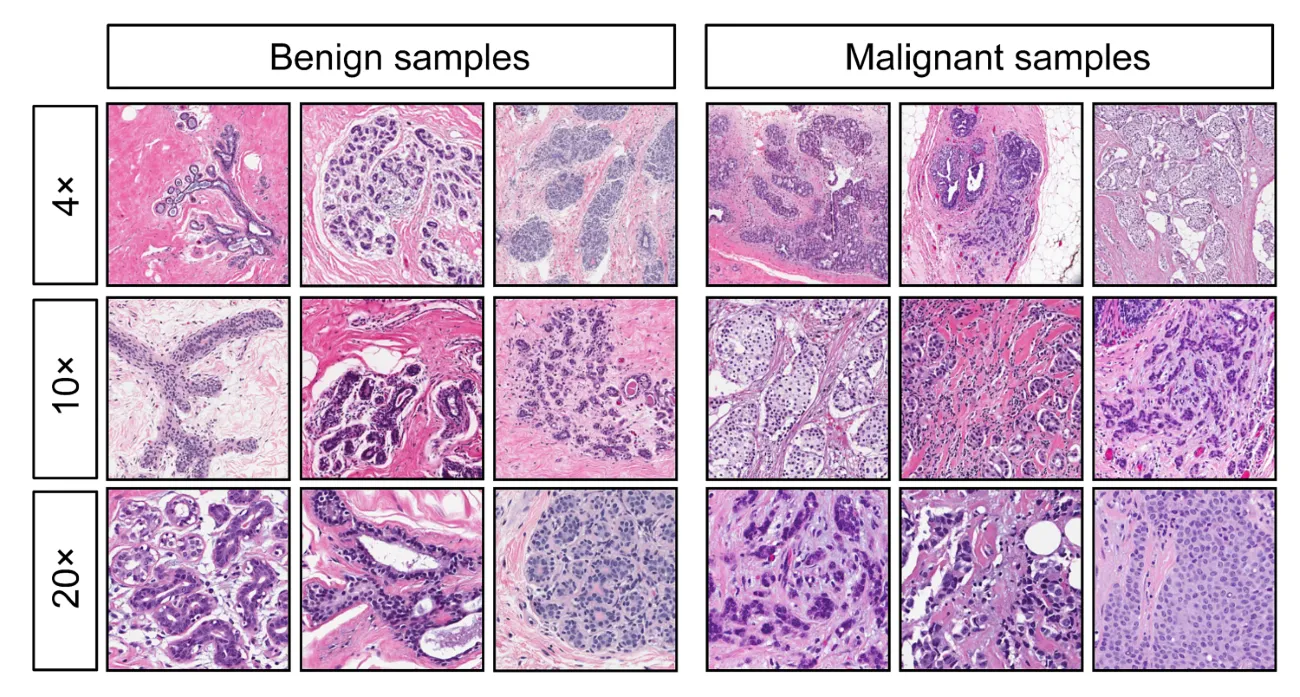

**Créditos:**

[UCI / Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)


[KEGLE / Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download)

###**1.1 Fonte dos dados**

Os dados desse projeto são resultados de biópsias .

O arquivo está disponibilizado na plataforma de github:

https://raw.githubusercontent.com/jardel-alves0314/analise-de-dados-puc-2023/main/mvp_sprint_2/breast_cancer_winsconsin.csv

###**1.2 Características do dataset**

Os dados desse projeto são resultados de biópsias .

1) ID: identificador da biópsia

2) Diagnosis: diagnóstico (M = maligno, B = benigno)

3 - 32) para cada item abaixo, foram calculados a média (_mean), desvio padrão (_se) e o pior caso(_worst):

    a) radius: raio (média das distâncias do centro aos pontos na borda)

    b) texture: textura (desvio padrão dos valores em escala de cinza)

    c) perimeter: perímetro

    d) area: área

    e) smoothness: suavidade (variação local nos comprimentos do raio)

    f) compactness: compacidade (perímetro^2 / área - 1.0)

    g) concavity: concavidade (gravidade das porções côncavas do contorno)

    h) concave points: pontos côncavos (número de porções côncavas do contorno)

    i) symmetry: simetria

    j) fractal dimension: dimensão fractal ("aproximação de contorno" - 1)

###**1.Objetivos**



1.   Comaparar os modelos de classificação aplicados ao dataset Cancer de Mama
2.   Demonstrar técnicas de pré-processamento
3.   Escolher um modelo adequado ao processamento
4.   Exibir outros critérios de performance do modelo



##**2. Bibliotecas**

In [91]:
pip install joblib


In [92]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

import os

from IPython.display import display

import itertools

from datetime import datetime

# Imports necessários
from abc import ABC, abstractmethod

import pandas as pd
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização

from sklearn.datasets import load_diabetes # para importar o dataset diabetes
from sklearn.datasets import load_iris

from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import cross_val_score # para executar a validação cruzada

from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM

from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM

from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos





from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import joblib



###**médtodo carregar_arquivo**
objetivo: carregar um arquivo num dataframe do tipo Pandas

recebe como parâmetros:
*   url - o endereço ou caminho onde o arquivo está hospedado
*   separador - string que separa os campos numa linha dentro do arquivo
*   colunas_tipo - parâmetro opcional que contém a lista dos tipos das colunas do arquivo

retorna:
um Pandas dataframe

In [93]:
#Carrega um arquivo hospedado numa página na web num dataframe pandas
def carregar_arquivo(url, separador = ',', colunas_tipos = None ):
  print("carregando arquivo:")
  print(url)
  return pd.read_csv(url, delimiter = separador, dtype = colunas_tipos)

###**método exibir_analise_descritiva**
objetivo: auxiliar na anállise do dataset, exibindo informações do dataset

recebe como parâmetros:
*  um daframe Pandas

retorna:
sem retorno

In [94]:
def exibir_analise_descritiva(dataset):
    print("informações sobre o dataset:")
    dataset.info()

    print()
    print("primeiras linhas do dataset:")
    display(dataset.head())

    print()
    print("últimas linhas do dataset:")
    print(dataset.tail(5))

    print()
    print("colunas do dataset:")
    print(dataset.dtypes)

    print()
    print("análise descritiva do dataset:")
    print(dataset.describe())

###**método testar_duplicidade**
objetivo: auxiliar na anállise do dataset, exibindo informações do dataset

recebe como parâmetros:
*  um daframe Pandas
*  um array com o nome das colunas

retorna:
sem retorno

In [95]:
def testar_duplicidade(dataset, colunas):
  possui_duplicidade = False
  for coluna in colunas:
    # Verificar se há duplicidades no campo 'id'
    duplicados = dataset[coluna].duplicated()

    # Verificar se há duplicidades no DataFrame
    existe_duplicidade = any(duplicados)

    if existe_duplicidade:
      possui_duplicidade = True
      print(f"Coluna com duplicidade: {coluna}")
      df = dataset.loc[duplicados]

  print("")

  if possui_duplicidade:
    print("Duplicidade localizada: SIM")
  else:
    print("Duplicidade localizada: NÃO")

  print("")

###**método exibir_histograma**
objetivo: exibir o histograma do dataset

recebe como parâmetros:
*  um daframe Pandas

retorna:
sem retorno

In [96]:
def exibir_histograma(dataset):
  # Histograma
  plt.close()
  dataset.hist(figsize = (15,10))
  plt.show()

###**método exibir_grafico_pizza**
objetivo: exibir um gráfico de pizza para uma coluna do dataset

recebe como parâmetros:
*  um daframe Pandas
*  uma lista de colunas

retorna:
sem retorno

In [97]:
def exibir_grafico_pizza(dataset, colunas):
  for coluna in colunas:
    # Contar as ocorrências de cada categoria
    contagem = dataset[coluna].value_counts()
    ocorrencias = contagem.values.tolist()
    categorias = contagem.index.tolist()

    plt.close()

    # Criar o gráfico de pizza
    plt.pie(ocorrencias, labels=categorias, autopct='%1.1f%%')

    # Adicionar um título
    plt.title(f'Distribuição da Variável {coluna}')

    # Exibir o gráfico
    plt.show()

###**método dicionario_para_dataframe**
objetivo: converter um dicionário num dataframe pandas

recebe como parâmetros:
*  um dicionário

retorna:
dataframe pandas

In [98]:
def dicionario_para_dataframe(dicionario):
  df = None
  try:
    df = pd.DataFrame.from_dict(dicionario)
  except:
    print("erro")
    print(dicionario)
    df = None
  return df

###**método plot_confusion_matrix**
objetivo: exibir a matriz de confusão


In [99]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada definindo `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão sem normalização')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if i^j and cm[i, j] >= 0 else "white",
                 )

    plt.tight_layout()
    plt.ylabel('REAL')
    plt.xlabel('PREDITO')
    # Mostra o gráfico
    plt.show()

###**método normalizar_dataset**
objetivo: executa a normalização do dataset todo

recebe como parâmetros:
*  dataset - um daframe Pandas
*  indice_coluna_inicial
*  indice_coluna_final

retorna:

dataset - cópia do dataset original já normalizado



In [100]:
def normalizar_dataset(dataset, indice_coluna_inicial, indice_coluna_final):
  copia = dataset.copy()

  #subset que vai ser normalizado
  df = copia.iloc[:,indice_coluna_inicial:indice_coluna_final]

  # Cria um objeto MinMaxScaler
  scaler = MinMaxScaler()

  #  calcula os valores mínimo e máximo para cada coluna do dataset, necessários para aplicar a normalização.
  scaler.fit_transform(df)

  # cria uma matriz de dados normalizados
  normalizado = scaler.transform(df)

  # cria o novo dataset com as colunas normalizadas
  df_normalizado = pd.DataFrame(normalizado, columns=df.columns)

  #substitui na cópia do dataset os valores normalizados das colunas
  for coluna in df_normalizado.columns:
    copia[coluna] = df_normalizado[coluna]

  return copia

###**classe PreProcesssamentoAbstrato**

objetivo: classe base de pré-processamento

In [101]:
class PreProcesssamentoAbstrato(ABC):

  def __init__(self):
     raise Exception("Essa classe precisa ter seu próprio construtor.")

  def executar(self, dataset):
    pass

###**classe PreProcessamentoFtSelectionKBestPorPosisicao**

objetivo: classe que encapsula o método SelectKBest para a escolha das características mais relevantes (x) para resultado (y)

construtor:


* dataset: dataset usado no modelo
* score_fucnction: especifica a métrica usada para avaliar a importância das características do dataset
    * possíveis valores para problemas de classificação e classificação multiclasse:
        * chi2: Teste qui-quadrado de independência entre cada recurso e a variável de destino (deve ser não negativa);
        * f_classif: Análise de variância unidirecional (ANOVA) entre cada recurso e a variável de destino;
    * possíveis valores para problemas de regressão:
        * f_regression: Teste F entre cada recurso e a variável de destino;
        * mutual_info_regression: Informação mútua entre cada recurso e a variável de destino;

* kfolds: quantidade de parâmetros retornados
* colunas_x: lista com as posições das características relevantes do dataset
* coluna_y: posição da coluna resultado (y)



método(s):

* executar: executa a seleção das características e atribui uma pontuação; imprime a apontuação das colunas de forma ordenada;



saída(s):
* dataset: novo dataset com as colunas eleitas, de acordo com o número de kfolds informado
X: lista com as colunas eleitas
y: coluna reusltado




In [102]:
class PreProcessamentoFtSelectionKBestPorPosisicao(PreProcesssamentoAbstrato):
  def __init__(self, dataset, score_fucnction, kfolds, colunas_x, coluna_y):
    self.dataset = dataset
    self.score_fucnction = score_fucnction
    self.kfolds = kfolds
    self.colunas_x = colunas_x
    self.coluna_y = coluna_y
    print("SELEÇÃO DE CAMPOS UTILIZANDO SELECTKBEST")

  def executar(self):
    # cria cópia
    copia =  self.dataset.get(self.dataset.columns[self.colunas_x])
    copia_colunas = list(copia.columns)

    print("")
    print("colunas originais:")
    print(self.dataset.columns)

    print("")
    print("colunas informadas:")
    print(copia.columns)

    # Seleção de atributos com SelectKBest
    best_var = SelectKBest(score_func=self.score_fucnction, k=self.kfolds)

    # Executa a função de pontuação em (X, y) e obtém os atributos selecionados
    fit = best_var.fit(copia.values, self.dataset[self.dataset.columns[self.coluna_y]].values)

    # Reduz X para os atributos selecionados
    # X = copia.values
    features = fit.transform(copia.values)

    # Resultados
    print('\nNúmero original de atributos:', len(copia.columns))
    print('\nNúmero reduzido de atributos:', features.shape[1])

    # Exibe os atributos selecionandos
    colunas_selecionadas = best_var.get_feature_names_out(input_features=copia.columns)
    print("\nAtributos Selecionados:", colunas_selecionadas)

    # Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
    np.set_printoptions(precision=6) # 3 casas decimais
    print("\nScores dos Atributos Originais (ordenados do maior para o menor score):")
    df_scores = pd.DataFrame(columns=["coluna", "score"])
    df_scores["coluna"] = copia.columns
    df_scores["score"] =  fit.scores_
    df_scores = df_scores.sort_values('score', ascending=False).reset_index(drop=True)

    display(df_scores)
    print("")

    df = pd.DataFrame(columns=colunas_selecionadas)
    for coluna in colunas_selecionadas:
      df[coluna] = copia[coluna]

    df[self.dataset.columns[self.coluna_y]] = self.dataset[self.dataset.columns[self.coluna_y]]

    display(df)

    array = df.values
    X = array[:,0:len(df.columns)-1] # atributos
    y = array[:,len(df.columns)-1] # classe (target)

    return df,X,y



###**classe ModeloAbstrato**

objetivo: classe base para o tratamento de modelos

construtor:
* parâmetro nome: nome do algoritmo
* parâmetro algoritmo: modelo instanciado


método(s):
* get_nome: retorna o nome do modelo
* get_algoritmo: retorna o modelo
* get_medidas: abstrato
* get_desvio_padrao: retorna o desvio padrão
* get_media: retorna a média
* treinar_testar_modelo: faz o treino do modelo e calcula as métricas de performance
    * parâmetros:

        * x: lista com os valores de treino
        * y: lista com os valores de saída
        * x_teste: lista com os valores do dataset de teste
        * y_teste: lista com os valores de saída do dataset de teste
        * kfold: quantidade de dobras usadas na validação cruzada
        * tipo_pontuacao: e a métrica de avaliação usada para calcular o desempenho do modelo.
* salvar: salva o modelo treinado em forma de arquivo
  * parâmetros:
      * nome: nome do arquivo
      * caminho: local onde o modelo será salvo
      * pipeline: opcional (True / False), indica se o modelo é um pipeline

saída:
* resultado: lista com as pontuações (scores) de avaliação para cada fold.   
* y_pred: valores preditos      

In [103]:
class ModeloAbstrato(ABC):
  def get_nome(self):
    return self.nome

  def get_algoritmo(self):
    return self.algoritmo

  def get_resultado(self):
    return self.resultado

  @abstractmethod
  def get_medidas(self):
    pass

  @abstractmethod
  def otmizar(self, x_train, y_train, x_test, y_test, parametros, kfolkds = 5, scoring="accuracy"):
    pass

  def salvar(self, nome, caminho, pipeline = False):
    # obtendo a data e hora atual
    now = datetime.now()

    # Definição do formato
    format = '%Y-%m-%dT%H%M'

    # Converter a data e hora em uma string com o formato especificado
    formatted_datetime = now.strftime(format)



    # salvando o modelo
    if not pipeline:
      name_model = nome + formatted_datetime + '.h5'
      self.algoritmo.save("%s/%s" % (caminho, name_model))
    else:
      os.makedirs(caminho, exist_ok=True)
      name_model = nome + formatted_datetime + '.plk'
      joblib.dump(self.algoritmo, "%s/%s" % (caminho, name_model))


    print("Modelo salvo com o nome: ", name_model)

    return "%s/%s" % (caminho, name_model)


  def get_desvio_padrao(self):
    return self.desvio_padrao

  def get_media(self):
    return self.media

  def treinar_testar_modelo(self, x, y, x_test, y_test, kfold, tipo_pontuacao):
    self.resultado = cross_val_score(self.algoritmo, x, y, cv = kfold, scoring = tipo_pontuacao)
    self.algoritmo.fit(x,y)
    self.media = self.resultado.mean()
    self.desvio_padrao = self.resultado.std()
    y_pred = self.algoritmo.predict(x_test)

    return self.resultado, y_pred


  def __init__(self, nome, algoritmo):
    self.nome = nome
    self.algoritmo = algoritmo
    self.pontuacao = None
    self.resultado = None
    self.media = None
    self.desvio_padrao = None



###**classe ModeloDeClassificacao**

objetivo: implementação da classe abstrata ModeloAbstrato; essa implementaçaão trata as particularidades de modelos de classificação.

construtor:
* parâmetro nome: nome do algoritmo
* parâmetro algoritmo: modelo instanciado


método(s):
* get_nome (ModeloAbstrato): retorna o nome do modelo
* get_algoritmo (ModeloAbstrato): retorna o modelo
* get_medidas: retornas as métricas utilizadas para a avalição de modelos de classificação
* get_desvio_padrao (ModeloAbstrato): retorna o desvio padrão
* get_media (ModeloAbstrato): retorna a média
* treinar_testar_modelo (override): faz o treino do modelo e calcula as métricas de performance
    * parâmetros:

        * x: lista com os valores de treino
        * y: lista com os valores de saída
        * x_teste: lista com os valores do dataset de teste
        * y_teste: lista com os valores de saída do dataset de teste
        * kfold: quantidade de dobras usadas na validação cruzada
        * tipo_pontuacao: e a métrica de avaliação usada para calcular o desempenho do modelo.


saída:
* resultado: lista com as pontuações (scores) de avaliação para cada fold.   
* y_pred: valores preditos      

In [104]:
class ModeloDeClassificacao(ModeloAbstrato):

  def otmizar(self, x_train, y_train, x_test, y_test, parametros, kfolkds = 5, scoring="accuracy"):

    grid_search = GridSearchCV(estimator=self.algoritmo, param_grid=parametros, cv=kfolkds, scoring="accuracy")

    gs = grid_search.fit(x_train, y_train)

    # Obter o melhor modelo encontrado pelo GridSearchCV
    best_model = grid_search.best_estimator_

    # Fazer previsões com o melhor modelo usando os dados de teste
    y_pred = best_model.predict(x_test)

    # Imprimir os melhores hiperparâmetros encontrados
    print("Melhores hiperparâmetros:")
    print(grid_search.best_params_)

    metricas = {
                "acuracia" : [accuracy_score(y_test, y_pred)],
                "precisao" : [precision_score(y_test, y_pred, average='weighted')],
                "recall"   : [recall_score(y_test, y_pred, average='weighted')],
                "f1"       : [f1_score(y_test, y_pred, average='weighted')]
    }

    confusao = confusion_matrix(y_test, y_pred)

    df = dicionario_para_dataframe(metricas)

    display(df)

    plot_confusion_matrix(confusao,
                      classes=self.classes_y,
                      normalize= False,
                      title='Matriz real x predição')



  def exibir_matriz_confusao(self):
    plot_confusion_matrix(self.confusao,
                      classes=self.classes_y,
                      normalize= False,
                      title='Matriz real x predição')


  def get_medidas(self):
    return {"modelo":[self.nome],
            "media":[self.media],
            "desvio_padrao":[self.desvio_padrao],
            # "pontuacao":[self.pontuacao],
            "acuracia": [self.acuracia],
            # "confusao": [self.confusao],
            "precisao": [self.precisao],
            "recall": [self.recall],
            "f1": [self.f1]}

  def treinar_testar_modelo(self, x, y, x_test, y_test, kfold, tipo_pontuacao):

    self.resultado, y_pred = super().treinar_testar_modelo(x, y, x_test, y_test, kfold, tipo_pontuacao)
    # Calcular as medidas de desempenho
    self.acuracia = accuracy_score(y_test, y_pred)
    self.confusao = confusion_matrix(y_test, y_pred)
    self.precisao =  precision_score(y_test, y_pred, average='weighted')
    self.recall = recall_score(y_test, y_pred, average='weighted')
    self.f1 = f1_score(y_test, y_pred, average='weighted')
    msg = "%s: %f (%f)" % (self.nome, self.media, self.desvio_padrao)
    print(msg)



    return self.resultado

  def __init__(self, nome, algoritmo, classes_y):
    super().__init__(nome, algoritmo)
    self.classes_y = classes_y
    self.acuracia = None
    self.confusao = None
    self.precisao =  None
    self.recall = None
    self.f1 = None

###**classe ModeloDeRegressao**

objetivo: implementação da classe abstrata ModeloAbstrato; essa implementaçaão trata as particularidades de modelos de regressão.

In [105]:
class ModeloDeRegressao(ModeloAbstrato):

  def get_medidas(self):
    return {"modelo":[self.nome],
            "media":[self.media],
            "desvio_padrao":[self.desvio_padrao],
            "erro_medio_absoluto - MAE":[self.erro_medio_absoluto],
            "erro_quadratico_medio - MSE":[self.erro_quadratico_medio],
            "raiz_quadrada_do_erro_quadratico_medio - RMSE":[self.raiz_quadrada_do_erro_quadratico_medio],
            "coeficiente_de_determinacao  - R2": [self.coeficiente_de_determinacao]
            }

  def treinar_testar_modelo(self, x, y, x_test, y_test, kfold, tipo_pontuacao):

    self.resultado, y_pred = super().treinar_testar_modelo(x, y, x_test, y_test, kfold, tipo_pontuacao)
    # Calcular as medidas de desempenho
    self.media = self.resultado.mean()
    self.desvio_padrao = self.resultado.std()
    self.erro_medio_absoluto = mean_absolute_error(y_test, y_pred)
    self.erro_quadratico_medio = mean_squared_error(y_test, y_pred)
    self.raiz_quadrada_do_erro_quadratico_medio =  np.sqrt(self.erro_quadratico_medio)
    self.coeficiente_de_determinacao = r2_score(y_test, y_pred)

    msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (self.nome, abs(self.media), self.desvio_padrao, np.sqrt(abs(self.media)))
    print(msg)

    return self.resultado

  def __init__(self, nome, algoritmo):
    super().__init__(nome, algoritmo)
    self.acuracia = None
    self.confusao = None
    self.precisao =  None
    self.recall = None
    self.f1 = None

construtor:
* parâmetro nome: nome do algoritmo
* parâmetro algoritmo: modelo instanciado


método(s):
* get_nome (ModeloAbstrato): retorna o nome do modelo
* get_algoritmo (ModeloAbstrato): retorna o modelo
* get_medidas: retornas as métricas utilizadas para a avalição de modelos de regressão
* get_desvio_padrao (ModeloAbstrato): retorna o desvio padrão
* get_media (ModeloAbstrato): retorna a média
* treinar_testar_modelo (override): faz o treino do modelo e calcula as métricas de performance
    * parâmetros:

        * x: lista com os valores de treino
        * y: lista com os valores de saída
        * x_teste: lista com os valores do dataset de teste
        * y_teste: lista com os valores de saída do dataset de teste
        * kfold: quantidade de dobras usadas na validação cruzada
        * tipo_pontuacao: e a métrica de avaliação usada para calcular o desempenho do modelo.


saída:
* resultado: lista com as pontuações (scores) de avaliação para cada fold.   
* y_pred: valores preditos      

###**classe GerenciadorDeModelos**

objetivo: classe para agrupar, gerenciar a execução dos modelos e comparar os resultados

construtor:

* dataset: dataset usado pelos modelos avaliados
* x: posição das colunas das características do dataset
* y: posição da coluna resultado do dataset
* tamanho_amostra_teste: valor que determina a proporção entre a quatidade de Treino e Teste
* randon_seed: número usado para geração de valores aleatórios, dessa forma padroniza para todos os modelos


método(s):
* get_atributos_x: retorna uma lista com as colunas
* get_avariavel_saida_y: retorna a coluna resultado
* get_X_train: retorna um array com os valores das características, dataset de treino
* get_X_test: retorna um array com os valores das características, dataset de teste
* get_y_train: retorna um array com os valores da coluna resultado, dataset de treino
* get_y_test: retorna um array com os valores da coluna resultado, dataset de teste
* get_resultados: retorna um array com o resultado de todos os modelos treinados
* mostrar_estaticas_modelos: exibe os valores das métricas de cada modelo
* incluir_modelo: inclui o modelo numa lista para ser avalido, essa função pode tanto receber um modelo qualquer quanto um Pipeline
  * parâmetros:
    * nome: nome que identifica o modelo
    * modelo: instância do modelo
    * classe: CLASSE que implementa ModeloAbstrato
* executar_comparar_modelos
  * parâmetros:
    * tipo_pontuacao: tipo de método de avaliação
    * tamanho_do_boxplot: opcional, ajusta o tamnho do gráfico box plot
    * rotacao_das_legendas: opcional, rotaciona as legendas do box plot

In [106]:
class GerenciadorDeModelos:

  def get_atributos_x(self):
    return self.x

  def get_avariavel_saida_y(self):
    return self.y

  def get_X_train(self):
    return self.X_train

  def get_X_test(self):
    return self.X_test

  def get_y_train(self):
    return self.y_train

  def get_y_test(self):
    return self.y_test

  def get_resultados(self):
    return self.resultados

  def get_modelos(self):
    return self.modelos

  def mostrar_estaticas_modelos(self, orderby = [], ascending=[]):
    if orderby is not None:
      df = self.df_estatisticas.sort_values(orderby,ascending=ascending)
      display(df)
      print(" ")
    else:
      display(self.df_estatisticas)
      print(" ")


  def __init__(self, dataset, x, y, tamanho_amostra_teste, randon_seed, tamanho_particao = 0):
    self.modelos  = {}
    self.resultados = []
    self.nomes = []
    self.df_estatisticas = None

    self.dataset = dataset
    self.x = x
    self.y = y

    self.tamanho_amostra_teste = tamanho_amostra_teste
    self.randon_seed = randon_seed
    np.random.seed(self.randon_seed)

    self.tamanho_particao = tamanho_particao

    if self.tamanho_particao > 0:
      self.kfold = KFold(n_splits=self.tamanho_particao , shuffle=True, random_state=self.randon_seed)
    else:
      self.kfold = None

    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size=self.tamanho_amostra_teste, random_state=self.randon_seed) # faz a divisão


  def incluir_modelo(self, nome, modelo):
    self.modelos[nome] = modelo
    self.nomes.append(nome)

  def otmizar(self, nomes_modelos, parametros, kfolkds = 5, scoring="accuracy"):

    for nome in nomes_modelos:
      print(nome)
      modelo = self.modelos[nome]

      modelo.otmizar(self.X_train, self.y_train, self.X_test, self.y_test, parametros, kfolkds = kfolkds, scoring=scoring)



  def executar_comparar_modelos(self, tipo_pontuacao, tamanho_do_boxplot = None,  rotacao_das_legendas=None):

    for nome, modelo in self.modelos.items():
      resultado = modelo.treinar_testar_modelo(self.X_train, self.y_train, self.X_test, self.y_test, self.kfold, tipo_pontuacao)
      self.resultados.append(resultado)

      df = dicionario_para_dataframe(modelo.get_medidas())

      if (self.df_estatisticas is None) :
        self.df_estatisticas = dicionario_para_dataframe(modelo.get_medidas())
      else:
        df =  dicionario_para_dataframe(modelo.get_medidas())
        self.df_estatisticas =  pd.concat([self.df_estatisticas,df])


    self.df_estatisticas = self.df_estatisticas.reset_index(drop=True)


    plt.close()
    fig = None
    if tamanho_do_boxplot is None:
        fig = plt.figure()
    else:
        fig = plt.figure(figsize=tamanho_do_boxplot)

    fig.suptitle('Comparação da Acurácia dos Modelos')
    ax = fig.add_subplot(111)
    dic_bp = plt.boxplot(self.resultados)

    ax.set_xticks(range(1, len(self.nomes) + 1))
    if rotacao_das_legendas is None:
        ax.set_xticklabels(self.nomes)
    else:
        ax.set_xticklabels(self.nomes, rotation=rotacao_das_legendas)

    ax.grid(True, axis='y', linestyle='-.', linewidth=0.2, color='lightgray')

    medianas = [item.get_ydata()[0] for item in dic_bp["medians"]]
    for mediana in medianas:
        ax.axhline(y=mediana, color='lightpink', linestyle='--')
    plt.show()


#**3. Execução e Testes dos Modelos**

##**3.1 Carga e Tramento do Dataset**

###**3.1.1 Carregando dataset: breast_cancer_winsconsin.csv**

In [107]:
url = "https://raw.githubusercontent.com/jardel-alves0314/analise-de-dados-puc-2023/main/mvp_sprint_2/breast_cancer_winsconsin.csv"
dataset_breast_cancer_original = carregar_arquivo(url)
dataset_breast_cancer_original.head()

carregando arquivo:
https://raw.githubusercontent.com/jardel-alves0314/analise-de-dados-puc-2023/main/mvp_sprint_2/breast_cancer_winsconsin.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


###**3.1.2 Analisando Colunas**

In [108]:
testar_duplicidade(dataset_breast_cancer_original, ["id"])



Duplicidade localizada: NÃO



In [109]:
exibir_analise_descritiva(dataset_breast_cancer_original)

informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



últimas linhas do dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst

###**3.1.3 Analisando Coluna Target: DIAGNOSIS**

valores:

B = BENIGNO

M = MALIGNO

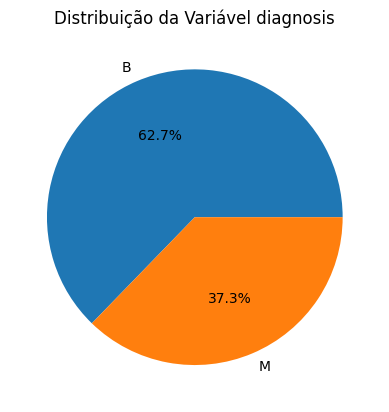

In [110]:
exibir_grafico_pizza(dataset_breast_cancer_original, ["diagnosis"])

###**3.1.4 Ajustando o Dataset**

In [111]:
# renomeando colunas que contêm espaços
dataset_breast_cancer_original = dataset_breast_cancer_original.rename(columns={"concave points_mean":"concave_points_mean","concave points_se":"concave_points_se","concave points_worst":"concave_points_worst"})

# rearranjando ordem das colunas, movendo a coluna "DIAGNOSIS" para o final da lista, essa é coluna TAGERT do dataset
dataset_breast_cancer_original = dataset_breast_cancer_original.reindex(columns = ["id","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave_points_mean","symmetry_mean","fractal_dimension_mean","radius_se",
    "texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave_points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst",
    "area_worst","smoothness_worst","compactness_worst","concavity_worst","concave_points_worst","symmetry_worst","fractal_dimension_worst","diagnosis"
])

# removendo campos nulos
dataset_breast_cancer_original = dataset_breast_cancer_original.dropna(subset=["id"]).reset_index(drop=True)
print(f"total de registros: {len(dataset_breast_cancer_original)}")
dataset_breast_cancer_original.head()


total de registros: 569


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


###**3.1.5 Separando um Conjunto de Dados para Validar do Modelo Selecionado**

In [112]:
# separando registros do dataset, tentando manter a mesma proporção
ds_maligno = dataset_breast_cancer_original.where(dataset_breast_cancer_original["diagnosis"] == "M").dropna(subset=["id"]).reset_index(drop=True).head(8)
ds_benigno = dataset_breast_cancer_original.where(dataset_breast_cancer_original["diagnosis"] == "B").dropna(subset=["id"]).reset_index(drop=True).head(12)

# cria a nova tabela e faz a reindexação
dataset_breast_cancer_validacao = pd.concat([ds_maligno,ds_benigno])
dataset_breast_cancer_validacao = dataset_breast_cancer_validacao.dropna(subset=["id"]).reset_index(drop=True)

# remove os registros que serão usados no modelo que for eleito
dataset_breast_cancer_original = dataset_breast_cancer_original[~dataset_breast_cancer_original["id"].isin(dataset_breast_cancer_validacao["id"])]
dataset_breast_cancer_original = dataset_breast_cancer_original.dropna(subset=["id"]).reset_index(drop=True)

dataset_breast_cancer_original.head()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,M
1,84501001,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,M
2,845636,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,M
3,84610002,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,...,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480,M
4,846226,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,...,29.94,151.70,1332.0,0.1037,0.3903,0.3639,0.17670,0.3176,0.10230,M


###**3.2.1 Comparando Modelos**

**objetivo**: comaprar cada modelo em situações distintas

**Modelos**:
* **KNN - KNeighborsClassifier**: algoritmo de aprendizado supervisionado, a partir dele traçar padrões que podem classificar ou agrupar nossos dados

* **CART - DecisionTreeClassifier**:  é um algoritmo de classificação que utiliza árvores de decisão para fazer previsões

* **NB - GaussianNB**: é um algoritmo de classificação baseado no teorema do classificador bayesiano ingênuo (Naive Bayes). Ele assume que os atributos são independentes entre si, ou seja, a presença de um determinado atributo em uma classe não está relacionada à presença de outros atributos

* **SVM -  Support Vector Classifier**: é um algoritmo de classificação baseado em máquinas de vetores de suporte. É uma extensão do algoritmo de Support Vector Machine (SVM) para problemas de classificação. O objetivo do SVC é encontrar o hiperplano ótimo que separa as amostras de diferentes classes no espaço de atributos

* **LR - LogisticRegression**: é um algoritmo de aprendizado de máquina usado para problemas de classificação binária. O objetivo da Regressão Logística é estimar a probabilidade de uma determinada variável de resposta pertencer a uma classe específica com base em um conjunto de variáveis preditoras.

**Ensembles**:
* **BAG - BaggingClassifier**:  é um algoritmo de ensemble learning que utiliza a técnica de bagging para melhorar o desempenho de modelos de aprendizado de máquina. O bagging (bootstrap aggregating) é uma abordagem que combina as previsões de vários modelos treinados em conjuntos de dados amostrados com reposição

* **RF - RandomForestClassifier**: é um algoritmo de aprendizado de máquina baseado em ensemble que utiliza a técnica de floresta aleatória para realizar tarefas de classificação. Ele é uma extensão do algoritmo de árvore de decisão, onde várias árvores de decisão são construídas e combinadas para obter uma classificação final

* **ET - ExtraTreesClassifier**:  é um algoritmo de aprendizado de máquina baseado em ensemble que utiliza a técnica de floresta aleatória para realizar tarefas de classificação. Assim como o RandomForestClassifier, ele é uma extensão do algoritmo de árvore de decisão, mas com algumas diferenças na forma como as árvores são construídas

* **ADA - AdaBoostClassifier**:  é um algoritmo de aprendizado de máquina baseado em ensemble que utiliza a técnica de boosting para realizar tarefas de classificação. O termo "AdaBoost" é a abreviação de "Adaptive Boosting"

* **GB - GradientBoostingClassifier**: é um algoritmo de aprendizado de máquina baseado em ensemble que utiliza a técnica de boosting para realizar tarefas de classificação. Assim como o AdaBoost, o GradientBoosting também pertence à família de algoritmos de boosting

**Transformações**:
* **Feature Selection**: seleção de características relevantes dos dados
* **StandardScaler**: padronização dos dados
* **min_max_scaler**: normalização dos dados

####**3.2.1.1 Comparando Modelos / ORIGINAIS**

KNN: 0.915751 (0.045458)
CART: 0.933932 (0.027759)
NB: 0.929387 (0.023718)
SVM: 0.906712 (0.042340)


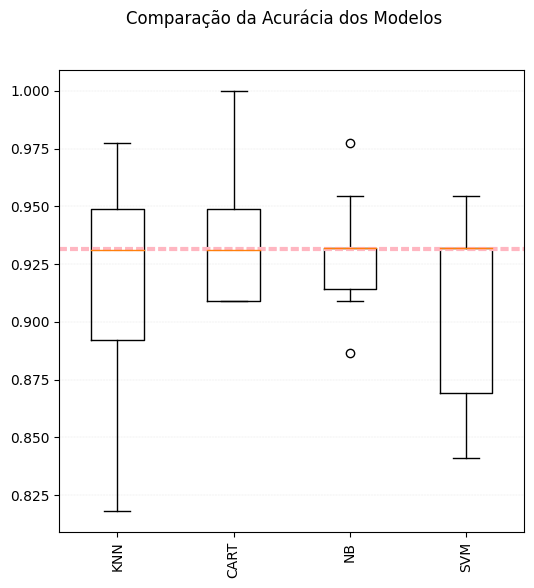

,modelo,media,desvio_padrao,acuracia,precisao,recall,f1
0,KNN,0.915751,0.045458,0.972727,0.972741,0.972727,0.972646
2,NB,0.929387,0.023718,0.963636,0.963892,0.963636,0.963410
1,CART,0.933932,0.027759,0.954545,0.954968,0.954545,0.954672
3,SVM,0.906712,0.042340,0.954545,0.955262,0.954545,0.954107


In [113]:
array = dataset_breast_cancer_original.values
gerenciador_tradcional = GerenciadorDeModelos(dataset_breast_cancer_original,array[:,1:31],array[:,31],0.20,7,tamanho_particao=10)

gerenciador_tradcional.incluir_modelo('KNN', ModeloDeClassificacao("KNN",  KNeighborsClassifier(),  ["B","M"]))
gerenciador_tradcional.incluir_modelo('CART',ModeloDeClassificacao("CART", DecisionTreeClassifier(),["B","M"]))
gerenciador_tradcional.incluir_modelo('NB',  ModeloDeClassificacao("NB",   GaussianNB(),            ["B","M"]))
gerenciador_tradcional.incluir_modelo('SVM', ModeloDeClassificacao("SVM",  SVC(),                   ["B","M"]))
gerenciador_tradcional.executar_comparar_modelos("accuracy",tamanho_do_boxplot = (6,6),  rotacao_das_legendas = 90)
gerenciador_tradcional.mostrar_estaticas_modelos(orderby=["acuracia"],ascending=[False])

####**3.2.1 Comparando Modelos / FEATURE SELECTION**

SELEÇÃO DE CAMPOS UTILIZANDO SELECTKBEST

colunas originais:
Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

colunas informadas:
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', '

,coluna,score
0,concave_points_worst,909.996213
1,perimeter_worst,866.082223
2,radius_worst,828.546232
3,concave_points_mean,811.107186
4,perimeter_mean,677.591099
5,area_worst,635.206217
6,radius_mean,631.991552
7,area_mean,556.577183
8,concavity_mean,500.731895
9,concavity_worst,410.798696


,radius_mean,perimeter_mean,area_mean,concave_points_mean,radius_worst,perimeter_worst,area_worst,concave_points_worst,diagnosis
0,13.00,87.50,519.8,0.09353,15.490,106.20,739.3,0.20600,M
1,12.46,83.97,475.9,0.08543,15.090,97.65,711.4,0.22100,M
2,16.02,102.70,797.8,0.03323,19.190,123.80,1150.0,0.09975,M
3,15.78,103.60,781.0,0.06606,20.420,136.50,1299.0,0.18100,M
4,19.17,132.40,1123.0,0.11180,20.960,151.70,1332.0,0.17670,M
...,...,...,...,...,...,...,...,...,...
544,21.56,142.00,1479.0,0.13890,25.450,166.10,2027.0,0.22160,M
545,20.13,131.20,1261.0,0.09791,23.690,155.00,1731.0,0.16280,M
546,16.60,108.30,858.1,0.05302,18.980,126.70,1124.0,0.14180,M
547,20.60,140.10,1265.0,0.15200,25.740,184.60,1821.0,0.26500,M


KNN_FS: 0.913478 (0.046295)
CART_FS: 0.904175 (0.046873)
NB_FS: 0.913425 (0.033437)
SVM_FS: 0.908985 (0.047573)


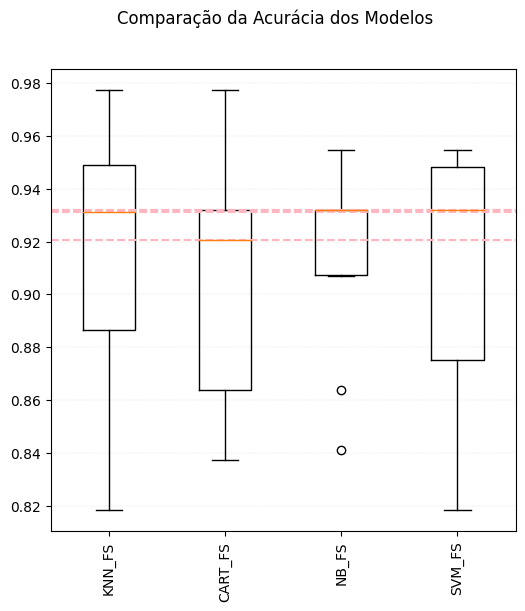

,modelo,media,desvio_padrao,acuracia,precisao,recall,f1
0,KNN_FS,0.913478,0.046295,0.963636,0.963892,0.963636,0.963410
3,SVM_FS,0.908985,0.047573,0.963636,0.965576,0.963636,0.963152
2,NB_FS,0.913425,0.033437,0.954545,0.955262,0.954545,0.954107
1,CART_FS,0.904175,0.046873,0.945455,0.946701,0.945455,0.945747


In [114]:
array = dataset_breast_cancer_original.values

preprocessmento_featureselection = PreProcessamentoFtSelectionKBestPorPosisicao(dataset_breast_cancer_original, f_classif, 8, range(1,31), 31)
df, x, y = preprocessmento_featureselection.executar()


gerenciador_tradcional_1 = GerenciadorDeModelos(df,x,y,0.20,7,tamanho_particao=10)

gerenciador_tradcional_1.incluir_modelo('KNN_FS',  ModeloDeClassificacao('KNN_FS',  KNeighborsClassifier(),   ["B","M"] ))
gerenciador_tradcional_1.incluir_modelo('CART_FS', ModeloDeClassificacao('CART_FS', DecisionTreeClassifier(), ["B","M"] ))
gerenciador_tradcional_1.incluir_modelo('NB_FS',   ModeloDeClassificacao('NB_FS',   GaussianNB(),             ["B","M"] ))
gerenciador_tradcional_1.incluir_modelo('SVM_FS',  ModeloDeClassificacao('SVM_FS',  SVC(),                    ["B","M"] ))

gerenciador_tradcional_1.executar_comparar_modelos("accuracy",tamanho_do_boxplot = (6,6),  rotacao_das_legendas = 90)
gerenciador_tradcional_1.mostrar_estaticas_modelos(orderby=["acuracia"],ascending=[False])

###**3.2.2 Comparando Modelos - PIPELINES**

####**3.2.2.1 Comparando Modelos - PIPELINES / ORIGINAIS**

LR_ORIGINAL: 0.940803 (0.032418)
KNN_ORIGINAL: 0.915751 (0.045458)
CART_ORIGINAL: 0.933932 (0.027759)
NB_ORIGINAL: 0.929387 (0.023718)
SVM_ORIGINAL: 0.906712 (0.042340)
BAG_ORIGINAL: 0.940803 (0.032418)
RF_ORIGINAL: 0.947622 (0.033767)
ET_ORIGINAL: 0.956712 (0.032865)
ADA_ORIGINAL: 0.963584 (0.020796)
GB_ORIGINAL: 0.943129 (0.042172)
VOT_ORIGINAL: 0.947622 (0.032201)


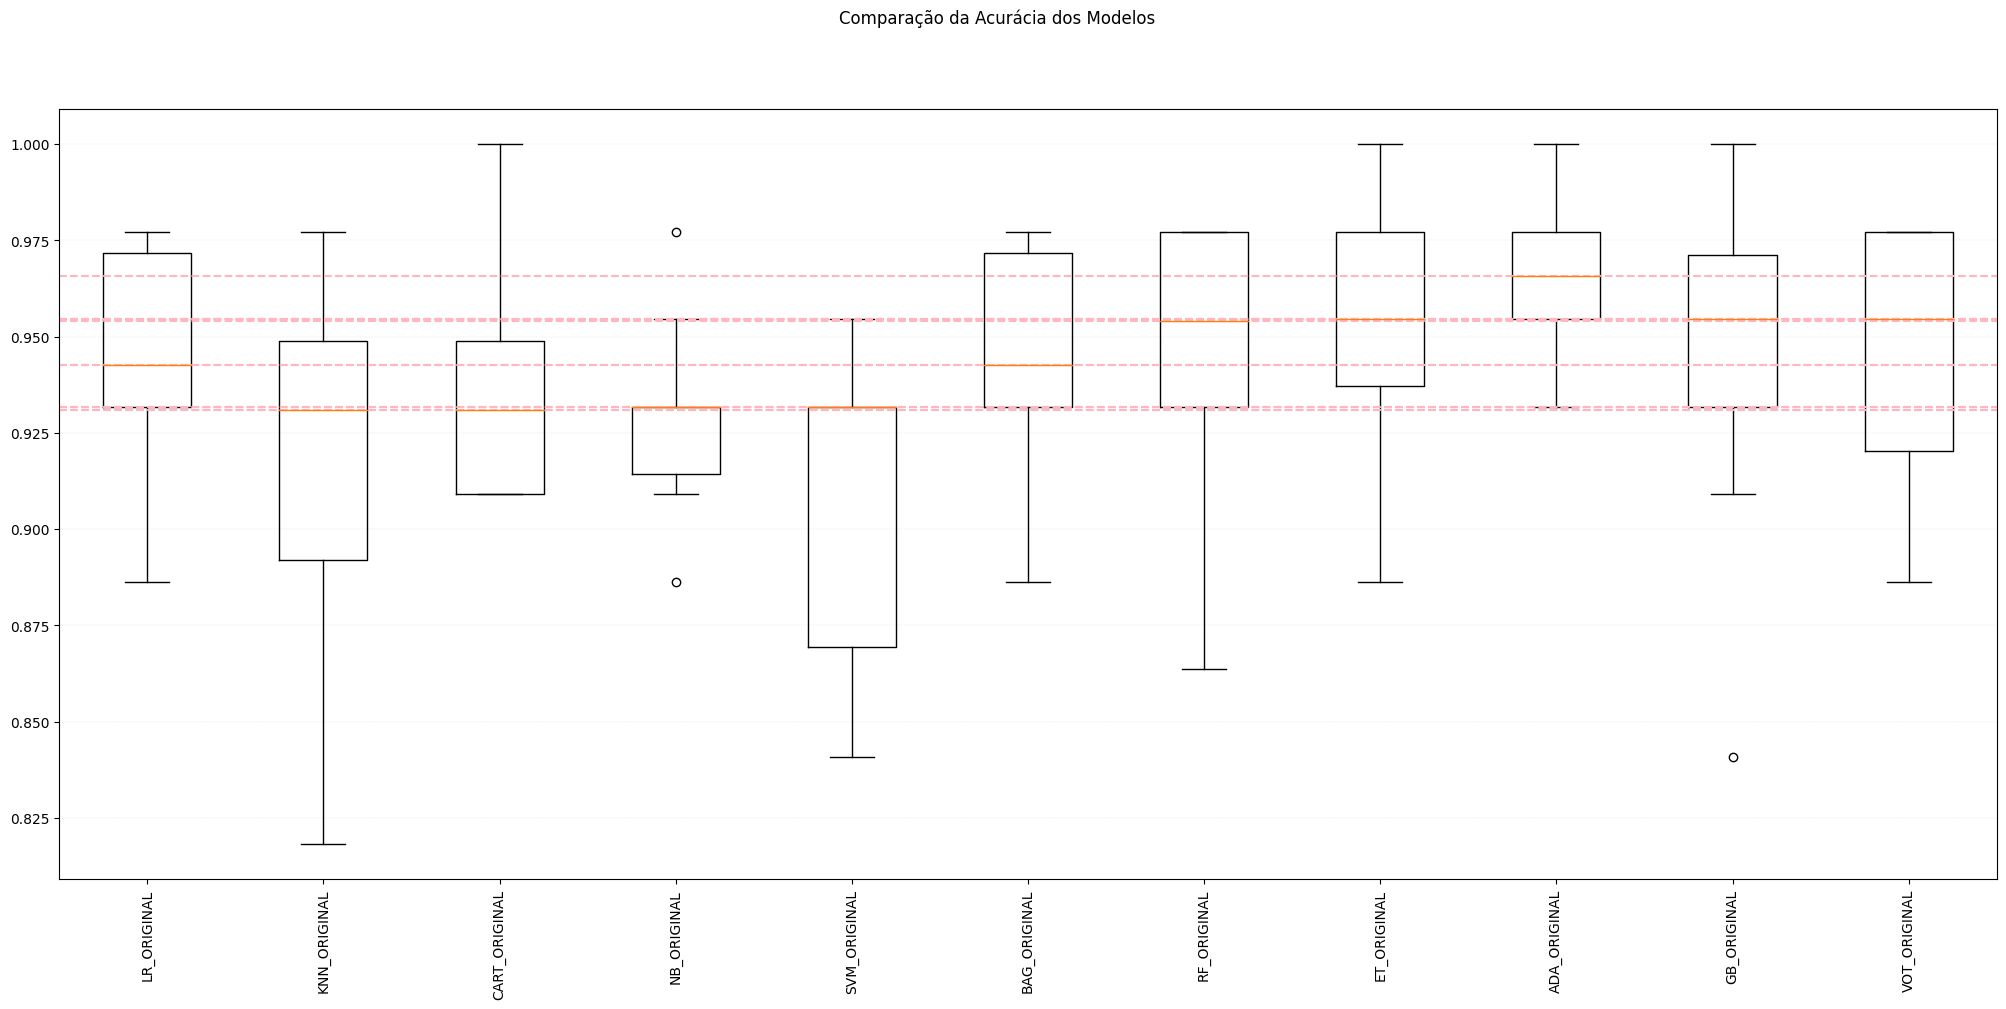

,modelo,media,desvio_padrao,acuracia,precisao,recall,f1
0,LR_ORIGINAL,0.940803,0.032418,0.981818,0.982316,0.981818,0.981705
5,BAG_ORIGINAL,0.940803,0.032418,0.981818,0.981818,0.981818,0.981818
7,ET_ORIGINAL,0.956712,0.032865,0.981818,0.982316,0.981818,0.981705
9,GB_ORIGINAL,0.943129,0.042172,0.981818,0.982316,0.981818,0.981705
1,KNN_ORIGINAL,0.915751,0.045458,0.972727,0.972741,0.972727,0.972646
6,RF_ORIGINAL,0.947622,0.033767,0.972727,0.973833,0.972727,0.972464
8,ADA_ORIGINAL,0.963584,0.020796,0.972727,0.972741,0.972727,0.972646
10,VOT_ORIGINAL,0.947622,0.032201,0.972727,0.972741,0.972727,0.972646
3,NB_ORIGINAL,0.929387,0.023718,0.963636,0.963892,0.963636,0.963410
2,CART_ORIGINAL,0.933932,0.027759,0.954545,0.954968,0.954545,0.954672


In [115]:
array = dataset_breast_cancer_original.values
gerenciador_original = GerenciadorDeModelos(dataset_breast_cancer_original,array[:,1:31],array[:,31],0.20,7,tamanho_particao=10)

gerenciador_original.incluir_modelo("LR_ORIGINAL",  ModeloDeClassificacao('LR_ORIGINAL', Pipeline([("LR",LogisticRegression(max_iter=200))]), ["B","M"] ))

gerenciador_original.incluir_modelo("KNN_ORIGINAL", ModeloDeClassificacao('KNN_ORIGINAL', Pipeline([("KNN",KNeighborsClassifier())]), ["B","M"] ))

gerenciador_original.incluir_modelo("CART_ORIGINAL",ModeloDeClassificacao('CART_ORIGINAL', Pipeline([("CART",DecisionTreeClassifier())]), ["B","M"] ))

gerenciador_original.incluir_modelo("NB_ORIGINAL",  ModeloDeClassificacao('NB_ORIGINAL', Pipeline([("NB",GaussianNB())]), ["B","M"] ))

gerenciador_original.incluir_modelo("SVM_ORIGINAL", ModeloDeClassificacao('SVM_ORIGINAL', Pipeline([("SVM",SVC())]), ["B","M"] ))

base = DecisionTreeClassifier()
numero_de_arvores = 100
gerenciador_original.incluir_modelo("BAG_ORIGINAL", ModeloDeClassificacao('BAG_ORIGINAL', Pipeline([("BAG",
                                                               BaggingClassifier(base_estimator = base, n_estimators = numero_de_arvores))]),
                                                              ["B","M"] ))

max_features = 3
gerenciador_original.incluir_modelo("RF_ORIGINAL", ModeloDeClassificacao('RF_ORIGINAL', Pipeline([("RF",
                                                               RandomForestClassifier(n_estimators = numero_de_arvores, max_features = max_features ))]),
                                                              ["B","M"] ))



gerenciador_original.incluir_modelo("ET_ORIGINAL", ModeloDeClassificacao('ET_ORIGINAL', Pipeline([("ET",
                                                              ExtraTreesClassifier(n_estimators=numero_de_arvores, max_features=max_features)
                                                              )]),
                                                             ["B","M"] ))

gerenciador_original.incluir_modelo("ADA_ORIGINAL", ModeloDeClassificacao('ADA_ORIGINAL', Pipeline([("ADA",
                                                              AdaBoostClassifier(n_estimators=numero_de_arvores))]),
                                                             ["B","M"] ))

gerenciador_original.incluir_modelo("GB_ORIGINAL", ModeloDeClassificacao('GB_ORIGINAL', Pipeline([("GB",
                                                              GradientBoostingClassifier(n_estimators=numero_de_arvores))]),
                                                            ["B","M"] ))

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))
gerenciador_original.incluir_modelo("VOT_ORIGINAL", ModeloDeClassificacao('VOT_ORIGINAL', Pipeline([("VOTING",
                                                              VotingClassifier(bases))]),
                                                            ["B","M"] ))


gerenciador_original.executar_comparar_modelos("accuracy",tamanho_do_boxplot = (25,10), rotacao_das_legendas=90)
gerenciador_original.mostrar_estaticas_modelos(orderby=["acuracia"],ascending=[False])


####**3.2.2.2 Comparando Modelos - PIPELINES / PADRONIZAÇÃO**

LR_PADRONIZADO: 0.979493 (0.018886)
KNN_PADRONIZADO: 0.954440 (0.038031)
CART_PADRONIZADO: 0.933932 (0.027759)
NB_PADRONIZADO: 0.920296 (0.025343)
SVM_PADRONIZADO: 0.974841 (0.027992)
BAG_PADRONIZADO: 0.940803 (0.032418)
RF_PADRONIZADO: 0.947622 (0.033767)
ET_PADRONIZADO: 0.956712 (0.032865)
ADA_PADRONIZADO: 0.963584 (0.020796)
GB_PADRONIZADO: 0.943129 (0.042172)
VOT_PADRONIZADO: 0.970296 (0.025248)


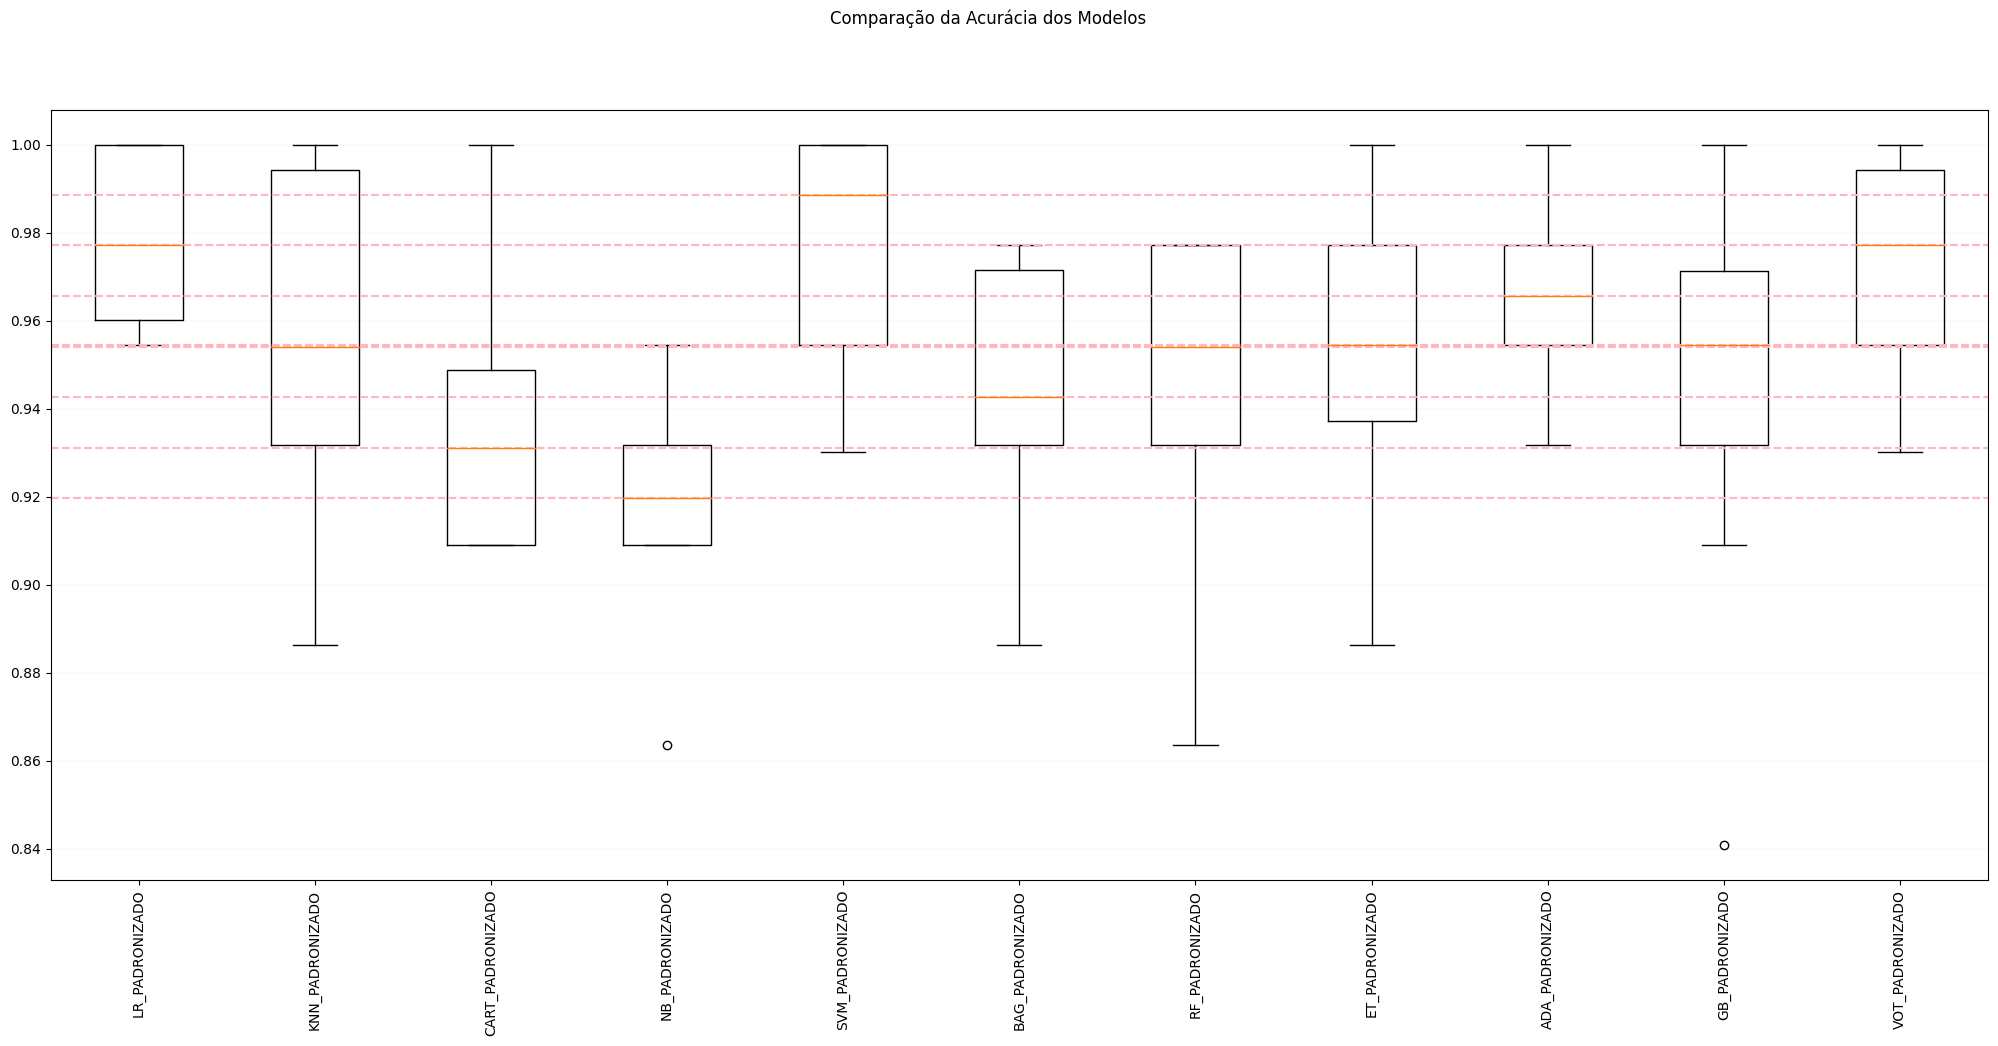

,modelo,media,desvio_padrao,acuracia,precisao,recall,f1
5,BAG_PADRONIZADO,0.940803,0.032418,0.981818,0.981818,0.981818,0.981818
7,ET_PADRONIZADO,0.956712,0.032865,0.981818,0.982316,0.981818,0.981705
9,GB_PADRONIZADO,0.943129,0.042172,0.981818,0.982316,0.981818,0.981705
10,VOT_PADRONIZADO,0.970296,0.025248,0.981818,0.982316,0.981818,0.981705
0,LR_PADRONIZADO,0.979493,0.018886,0.972727,0.973833,0.972727,0.972464
1,KNN_PADRONIZADO,0.954440,0.038031,0.972727,0.972741,0.972727,0.972646
4,SVM_PADRONIZADO,0.974841,0.027992,0.972727,0.972741,0.972727,0.972646
6,RF_PADRONIZADO,0.947622,0.033767,0.972727,0.973833,0.972727,0.972464
8,ADA_PADRONIZADO,0.963584,0.020796,0.972727,0.972741,0.972727,0.972646
2,CART_PADRONIZADO,0.933932,0.027759,0.954545,0.954968,0.954545,0.954672


In [116]:
# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())

array = dataset_breast_cancer_original.values
gerenciador_padronizado = GerenciadorDeModelos(dataset_breast_cancer_original,array[:,1:31],array[:,31],0.20,7,tamanho_particao=10)

gerenciador_padronizado.incluir_modelo("LR_PADRONIZADO", ModeloDeClassificacao("LR_PADRONIZADO", Pipeline([standard_scaler,("LR",LogisticRegression(max_iter=200))]), ["B","M"]))

gerenciador_padronizado.incluir_modelo("KNN_PADRONIZADO", ModeloDeClassificacao("KNN_PADRONIZADO",Pipeline([standard_scaler,("KNN",KNeighborsClassifier())]),  ["B","M"]))

gerenciador_padronizado.incluir_modelo("CART_PADRONIZADO",ModeloDeClassificacao("CART_PADRONIZADO",Pipeline([standard_scaler,("CART",DecisionTreeClassifier())]),  ["B","M"]))

gerenciador_padronizado.incluir_modelo("NB_PADRONIZADO",  ModeloDeClassificacao("NB_PADRONIZADO",Pipeline([standard_scaler,("NB",GaussianNB())]),  ["B","M"]))

gerenciador_padronizado.incluir_modelo("SVM_PADRONIZADO", ModeloDeClassificacao("SVM_PADRONIZADO",Pipeline([standard_scaler,("SVM",SVC())]),  ["B","M"]))

base = DecisionTreeClassifier()
numero_de_arvores = 100
gerenciador_padronizado.incluir_modelo("BAG_PADRONIZADO", ModeloDeClassificacao("BAG_PADRONIZADO",Pipeline([standard_scaler,("BAG",
                                                               BaggingClassifier(base_estimator = base, n_estimators = numero_de_arvores))]),
                                                               ["B","M"]))

max_features = 3
gerenciador_padronizado.incluir_modelo("RF_PADRONIZADO", ModeloDeClassificacao("RF_PADRONIZADO",Pipeline([standard_scaler,("RF",
                                                               RandomForestClassifier(n_estimators = numero_de_arvores, max_features = max_features ))]),
                                                               ["B","M"]))

gerenciador_padronizado.incluir_modelo("ET_PADRONIZADO", ModeloDeClassificacao("ET_PADRONIZADO",Pipeline([standard_scaler,("ET",
                                                              ExtraTreesClassifier(n_estimators=numero_de_arvores, max_features=max_features)
                                                              )]),
                                                              ["B","M"]))

gerenciador_padronizado.incluir_modelo("ADA_PADRONIZADO", ModeloDeClassificacao("ADA_PADRONIZADO",Pipeline([standard_scaler,("ADA",
                                                              AdaBoostClassifier(n_estimators=numero_de_arvores))]),
                                                              ["B","M"]))

gerenciador_padronizado.incluir_modelo("GB_PADRONIZADO", ModeloDeClassificacao("GB_PADRONIZADO",Pipeline([standard_scaler,("GB",
                                                              GradientBoostingClassifier(n_estimators=numero_de_arvores))]),
                                                             ["B","M"]))

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))
gerenciador_padronizado.incluir_modelo("VOT_PADRONIZADO", ModeloDeClassificacao("VOT_PADRONIZADO",Pipeline([standard_scaler,("VOTING",
                                                              VotingClassifier(bases))]),
                                                             ["B","M"]))


gerenciador_padronizado.executar_comparar_modelos("accuracy",tamanho_do_boxplot = (25,10), rotacao_das_legendas=90)
gerenciador_padronizado.mostrar_estaticas_modelos(orderby=["acuracia"],ascending=[False])


####**3.2.2.3 Comparando Modelos - PIPELINES / NORMALIZAÇÃO**

LR_NORMALIZADO: 0.965803 (0.021013)
KNN_NORMALIZADO: 0.970402 (0.028826)
CART_NORMALIZADO: 0.933932 (0.027759)
NB_NORMALIZADO: 0.920296 (0.025343)
SVM_NORMALIZADO: 0.974841 (0.026081)
BAG_NORMALIZADO: 0.940803 (0.032418)
RF_NORMALIZADO: 0.947622 (0.033767)
ET_NORMALIZADO: 0.956712 (0.032865)
ADA_NORMALIZADO: 0.963584 (0.020796)
GB_NORMALIZADO: 0.945402 (0.036882)
VOT_NORMALIZADO: 0.979387 (0.024049)


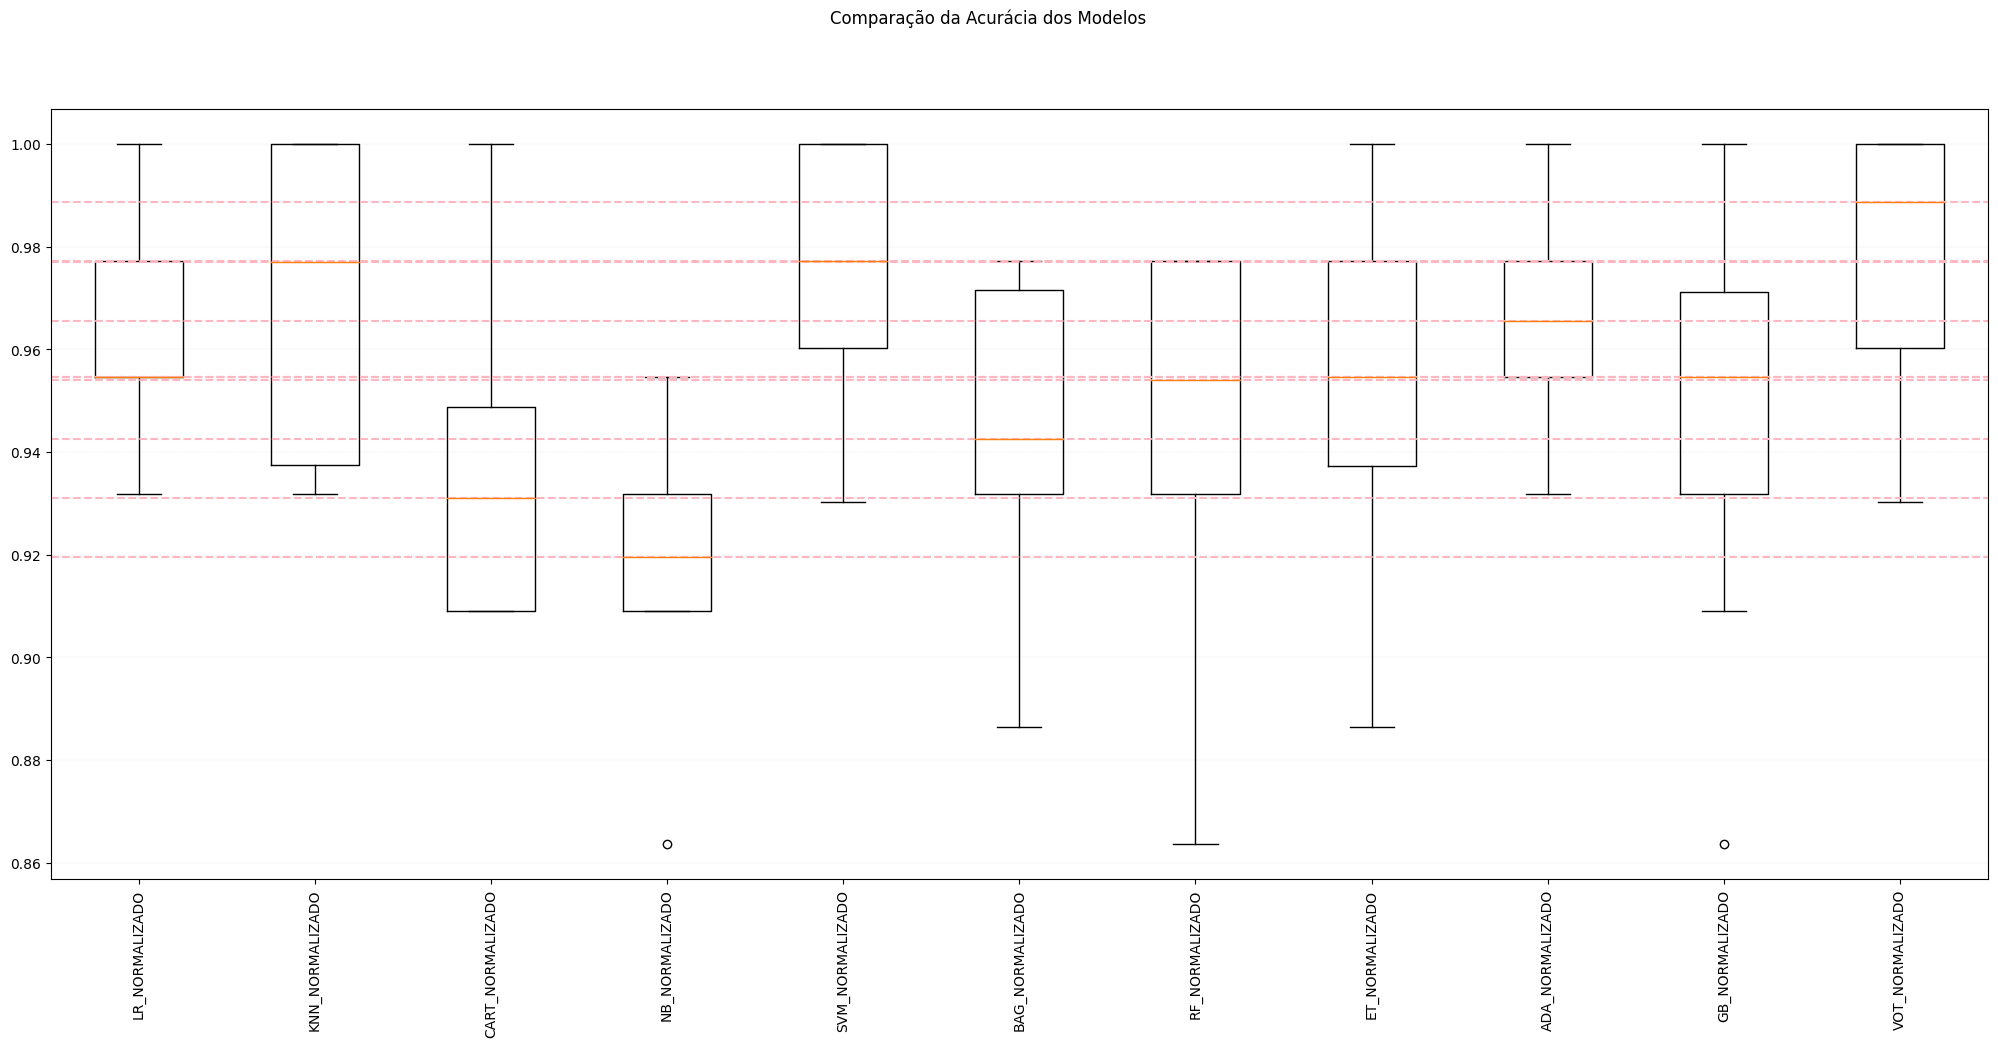

,modelo,media,desvio_padrao,acuracia,precisao,recall,f1
0,LR_NORMALIZADO,0.965803,0.021013,0.981818,0.982316,0.981818,0.981705
5,BAG_NORMALIZADO,0.940803,0.032418,0.981818,0.981818,0.981818,0.981818
7,ET_NORMALIZADO,0.956712,0.032865,0.981818,0.982316,0.981818,0.981705
9,GB_NORMALIZADO,0.945402,0.036882,0.981818,0.982316,0.981818,0.981705
10,VOT_NORMALIZADO,0.979387,0.024049,0.981818,0.982316,0.981818,0.981705
1,KNN_NORMALIZADO,0.970402,0.028826,0.972727,0.972741,0.972727,0.972646
4,SVM_NORMALIZADO,0.974841,0.026081,0.972727,0.972741,0.972727,0.972646
6,RF_NORMALIZADO,0.947622,0.033767,0.972727,0.973833,0.972727,0.972464
8,ADA_NORMALIZADO,0.963584,0.020796,0.972727,0.972741,0.972727,0.972646
2,CART_NORMALIZADO,0.933932,0.027759,0.954545,0.954968,0.954545,0.954672


In [117]:
# Transformações que serão utilizadas
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

array = dataset_breast_cancer_original.values
gerenciador_normalizado = GerenciadorDeModelos(dataset_breast_cancer_original,array[:,1:31],array[:,31],0.20,7,tamanho_particao=10)

gerenciador_normalizado.incluir_modelo("LR_NORMALIZADO",  ModeloDeClassificacao("LR_NORMALIZADO", Pipeline([min_max_scaler,("LR",LogisticRegression(max_iter=200))]), ["B","M"]))


gerenciador_normalizado.incluir_modelo("KNN_NORMALIZADO", ModeloDeClassificacao("KNN_NORMALIZADO", Pipeline([min_max_scaler,("KNN",KNeighborsClassifier())]), ["B","M"]))

gerenciador_normalizado.incluir_modelo("CART_NORMALIZADO",ModeloDeClassificacao("CART_NORMALIZADO", Pipeline([min_max_scaler,("CART",DecisionTreeClassifier())]), ["B","M"]))

gerenciador_normalizado.incluir_modelo("NB_NORMALIZADO",  ModeloDeClassificacao("NB_NORMALIZADO", Pipeline([min_max_scaler,("NB",GaussianNB())]), ["B","M"]))

gerenciador_normalizado.incluir_modelo("SVM_NORMALIZADO", ModeloDeClassificacao("SVM_NORMALIZADO", Pipeline([min_max_scaler,("SVM",SVC())]), ["B","M"]))

base = DecisionTreeClassifier()
numero_de_arvores = 100
gerenciador_normalizado.incluir_modelo("BAG_NORMALIZADO", ModeloDeClassificacao("BAG_NORMALIZADO", Pipeline([min_max_scaler,("BAG",
                                                               BaggingClassifier(base_estimator = base, n_estimators = numero_de_arvores))]),
                                                              ["B","M"]))

max_features = 3
gerenciador_normalizado.incluir_modelo("RF_NORMALIZADO", ModeloDeClassificacao("RF_NORMALIZADO", Pipeline([min_max_scaler,("RF",
                                                               RandomForestClassifier(n_estimators = numero_de_arvores, max_features = max_features ))]),
                                                              ["B","M"]))

gerenciador_normalizado.incluir_modelo("ET_NORMALIZADO", ModeloDeClassificacao("ET_NORMALIZADO", Pipeline([min_max_scaler,("ET",
                                                              ExtraTreesClassifier(n_estimators=numero_de_arvores, max_features=max_features)
                                                              )]),
                                                             ["B","M"]))

gerenciador_normalizado.incluir_modelo("ADA_NORMALIZADO", ModeloDeClassificacao("ADA_NORMALIZADO", Pipeline([min_max_scaler,("ADA",
                                                              AdaBoostClassifier(n_estimators=numero_de_arvores))]),
                                                             ["B","M"]))

gerenciador_normalizado.incluir_modelo("GB_NORMALIZADO", ModeloDeClassificacao("GB_NORMALIZADO", Pipeline([min_max_scaler,("GB",
                                                              GradientBoostingClassifier(n_estimators=numero_de_arvores))]),
                                                            ["B","M"]))

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))
gerenciador_normalizado.incluir_modelo("VOT_NORMALIZADO", ModeloDeClassificacao("VOT_NORMALIZADO", Pipeline([min_max_scaler,("VOTING",
                                                              VotingClassifier(bases))]),
                                                            ["B","M"]))


gerenciador_normalizado.executar_comparar_modelos("accuracy",tamanho_do_boxplot = (25,10), rotacao_das_legendas=90)
gerenciador_normalizado.mostrar_estaticas_modelos(orderby=["acuracia"],ascending=[False])


####**3.2.2-1 Comparando Modelos - PIPELINES / Feature Selection**

LR_FS: 0.933985 (0.031177)
KNN_FS: 0.908932 (0.044225)
CART_FS: 0.901903 (0.046021)
NB_FS: 0.913425 (0.034948)
SVM_FS: 0.908985 (0.047573)
BAG_FS: 0.920296 (0.043381)
RF_FS: 0.938478 (0.028879)
ET_FS: 0.933985 (0.042408)
ADA_FS: 0.920349 (0.036901)
GB_FS: 0.927114 (0.039086)
VOT_FS: 0.931712 (0.045403)


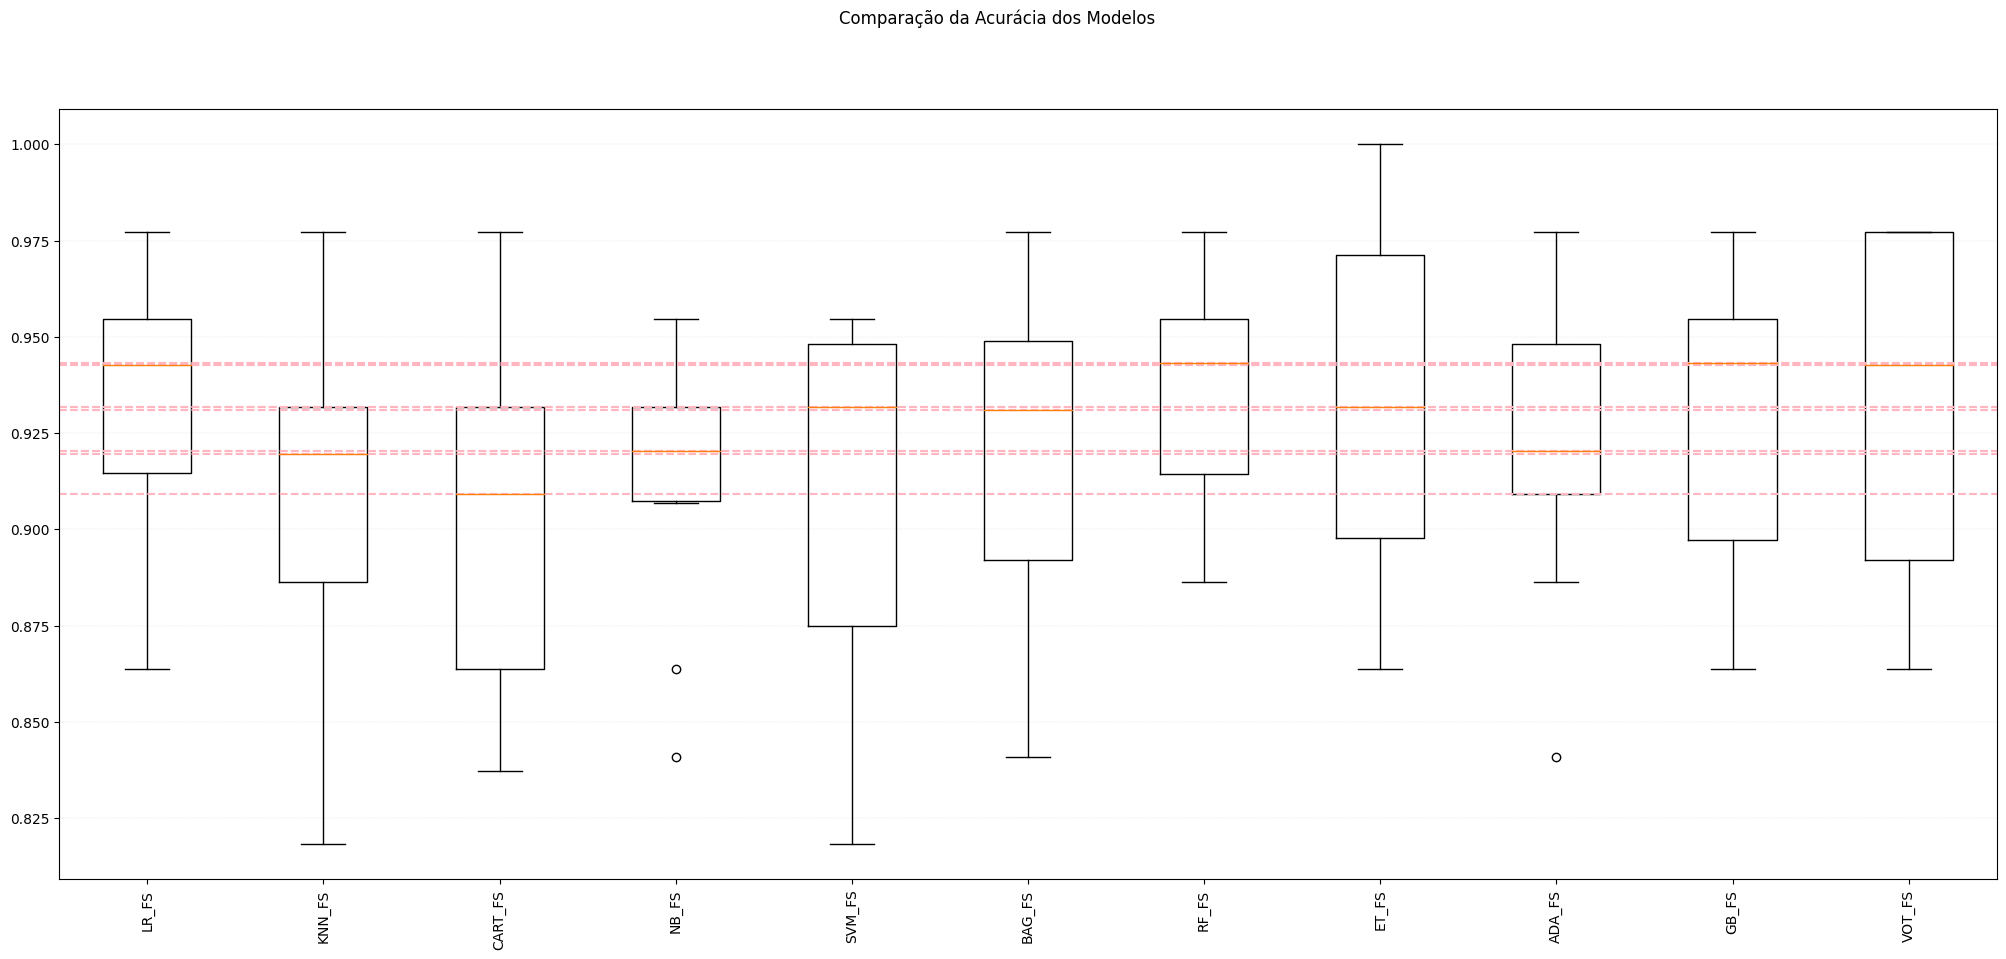

,modelo,media,desvio_padrao,acuracia,precisao,recall,f1
7,ET_FS,0.933985,0.042408,0.990909,0.991035,0.990909,0.990882
0,LR_FS,0.933985,0.031177,0.972727,0.973833,0.972727,0.972464
5,BAG_FS,0.920296,0.043381,0.972727,0.972741,0.972727,0.972646
9,GB_FS,0.927114,0.039086,0.972727,0.973833,0.972727,0.972464
10,VOT_FS,0.931712,0.045403,0.972727,0.973833,0.972727,0.972464
1,KNN_FS,0.908932,0.044225,0.963636,0.963892,0.963636,0.963410
4,SVM_FS,0.908985,0.047573,0.963636,0.965576,0.963636,0.963152
6,RF_FS,0.938478,0.028879,0.963636,0.963636,0.963636,0.963636
8,ADA_FS,0.920349,0.036901,0.963636,0.963892,0.963636,0.963410
3,NB_FS,0.913425,0.034948,0.954545,0.955262,0.954545,0.954107


In [118]:
# Transformações que serão utilizadas
fs_kbest = ("select_feature",SelectKBest(score_func=f_classif, k=8))

array = dataset_breast_cancer_original.values
gerenciador_fs_kbest = GerenciadorDeModelos(dataset_breast_cancer_original,array[:,1:31],array[:,31],0.20,7,tamanho_particao=10)

gerenciador_fs_kbest.incluir_modelo("LR_FS",  ModeloDeClassificacao("LR_FS", Pipeline([fs_kbest,("LR",LogisticRegression(max_iter=200))]), ["B","M"]))

gerenciador_fs_kbest.incluir_modelo("KNN_FS", ModeloDeClassificacao("KNN_FS", Pipeline([fs_kbest,("KNN",KNeighborsClassifier())]), ["B","M"]))

gerenciador_fs_kbest.incluir_modelo("CART_FS",ModeloDeClassificacao("CART_FS", Pipeline([fs_kbest,("CART",DecisionTreeClassifier())]), ["B","M"]))

gerenciador_fs_kbest.incluir_modelo("NB_FS",  ModeloDeClassificacao("NB_FS", Pipeline([fs_kbest,("NB",GaussianNB())]), ["B","M"]))

gerenciador_fs_kbest.incluir_modelo("SVM_FS", ModeloDeClassificacao("SVM_FS", Pipeline([fs_kbest,("SVM",SVC())]), ["B","M"]))

base = DecisionTreeClassifier()
numero_de_arvores = 100
gerenciador_fs_kbest.incluir_modelo("BAG_FS", ModeloDeClassificacao("BAG_FS", Pipeline([fs_kbest,("BAG",
                                                               BaggingClassifier(base_estimator = base, n_estimators = numero_de_arvores))]),
                                                              ["B","M"]))

max_features = 3
gerenciador_fs_kbest.incluir_modelo("RF_FS", ModeloDeClassificacao("RF_FS", Pipeline([fs_kbest,("RF",
                                                               RandomForestClassifier(n_estimators = numero_de_arvores, max_features = max_features ))]),
                                                              ["B","M"]))

gerenciador_fs_kbest.incluir_modelo("ET_FS", ModeloDeClassificacao("ET_FS", Pipeline([fs_kbest,("ET",
                                                              ExtraTreesClassifier(n_estimators=numero_de_arvores, max_features=max_features)
                                                              )]),
                                                             ["B","M"]))

gerenciador_fs_kbest.incluir_modelo("ADA_FS", ModeloDeClassificacao("ADA_FS", Pipeline([fs_kbest,("ADA",
                                                              AdaBoostClassifier(n_estimators=numero_de_arvores))]),
                                                             ["B","M"]))

gerenciador_fs_kbest.incluir_modelo("GB_FS", ModeloDeClassificacao("GB_FS", Pipeline([fs_kbest,("GB",
                                                              GradientBoostingClassifier(n_estimators=numero_de_arvores))]),
                                                            ["B","M"]))

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))
gerenciador_fs_kbest.incluir_modelo("VOT_FS", ModeloDeClassificacao("VOT_FS", Pipeline([fs_kbest,("VOTING",
                                                              VotingClassifier(bases))]),
                                                            ["B","M"]))


gerenciador_fs_kbest.executar_comparar_modelos("accuracy",tamanho_do_boxplot = (25,10), rotacao_das_legendas=90)
gerenciador_fs_kbest.mostrar_estaticas_modelos(orderby=["acuracia"],ascending=[False])


###**3.2.3 Comparando Modelos - RAKING DOS MELHORES**

KNN: 0.915751 (0.045458)
CART: 0.933932 (0.027759)
NB: 0.929387 (0.023718)
BAG_ORIGINAL: 0.945402 (0.030775)
ET_ORIGINAL: 0.963584 (0.033994)
LR_ORIGINAL: 0.940803 (0.032418)
GB_PADRONIZADO: 0.945402 (0.042113)
ET_PADRONIZADO: 0.958985 (0.024500)
BAG_PADRONIZADO: 0.947622 (0.024973)
RF_NORMALIZADO: 0.954440 (0.022729)
ET_NORMALIZADO: 0.956660 (0.031375)
LR_NORMALIZADO: 0.965803 (0.021013)
ET_FS: 0.931712 (0.043067)
LR_FS: 0.933985 (0.031177)
BAG_FS: 0.924841 (0.028804)


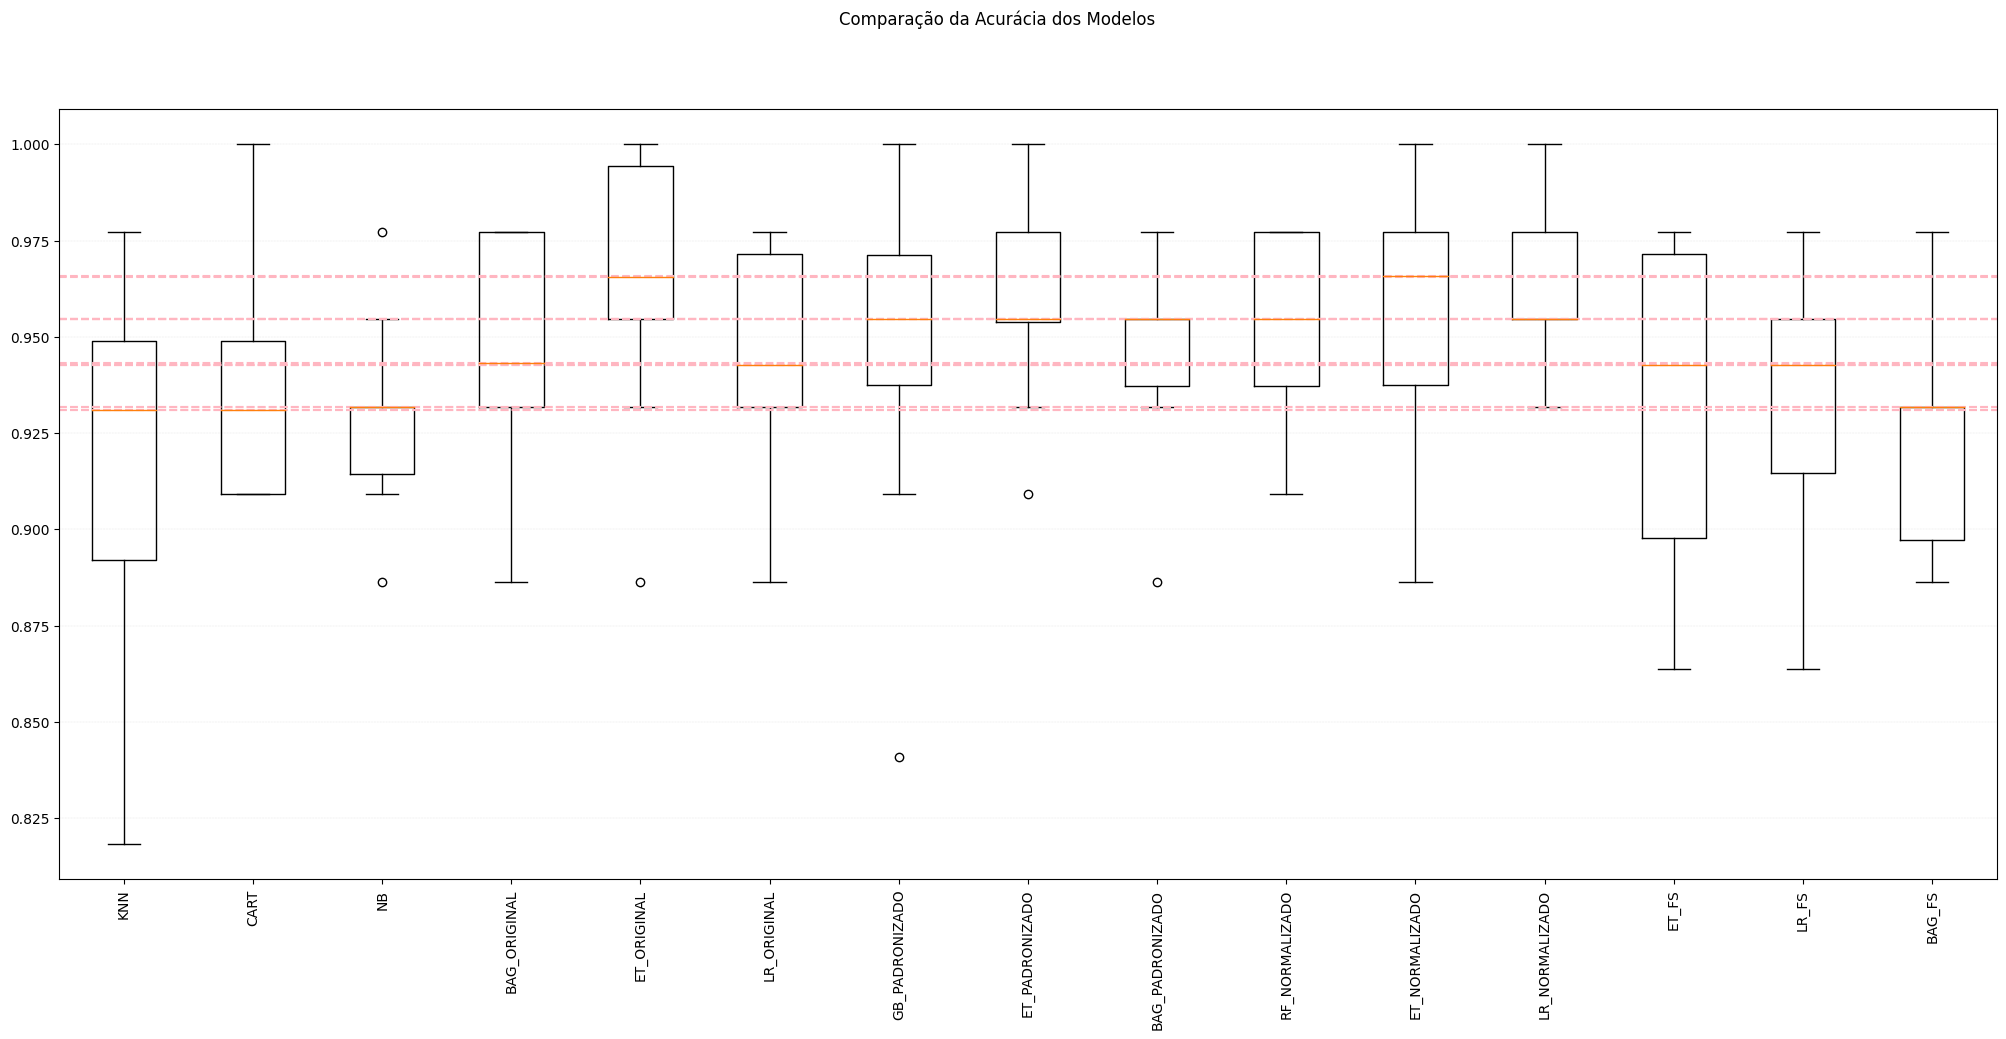

,modelo,media,desvio_padrao,acuracia,precisao,recall,f1
8,BAG_PADRONIZADO,0.947622,0.024973,0.990909,0.991035,0.990909,0.990882
9,RF_NORMALIZADO,0.954440,0.022729,0.990909,0.991035,0.990909,0.990882
3,BAG_ORIGINAL,0.945402,0.030775,0.981818,0.981818,0.981818,0.981818
5,LR_ORIGINAL,0.940803,0.032418,0.981818,0.982316,0.981818,0.981705
6,GB_PADRONIZADO,0.945402,0.042113,0.981818,0.982316,0.981818,0.981705
7,ET_PADRONIZADO,0.958985,0.024500,0.981818,0.982316,0.981818,0.981705
11,LR_NORMALIZADO,0.965803,0.021013,0.981818,0.982316,0.981818,0.981705
12,ET_FS,0.931712,0.043067,0.981818,0.982316,0.981818,0.981705
0,KNN,0.915751,0.045458,0.972727,0.972741,0.972727,0.972646
4,ET_ORIGINAL,0.963584,0.033994,0.972727,0.973833,0.972727,0.972464


In [119]:
#
gerenciador = GerenciadorDeModelos(dataset_breast_cancer_original,array[:,1:31],array[:,31],0.20,7,tamanho_particao=10)

gerenciador.incluir_modelo('KNN', ModeloDeClassificacao('KNN', KNeighborsClassifier(), ["B","M"]))
gerenciador.incluir_modelo('CART',ModeloDeClassificacao('CART',DecisionTreeClassifier(), ["B","M"]))
gerenciador.incluir_modelo('NB',  ModeloDeClassificacao('NB',GaussianNB(), ["B","M"]))

base1 = DecisionTreeClassifier()
numero_de_arvores = 100
gerenciador.incluir_modelo("BAG_ORIGINAL", ModeloDeClassificacao('BAG_ORIGINAL',Pipeline([("BAG",
                                                               BaggingClassifier(base_estimator = base1, n_estimators = numero_de_arvores))]),
                                                              ["B","M"]))


gerenciador.incluir_modelo("ET_ORIGINAL", ModeloDeClassificacao('ET_ORIGINAL',Pipeline([("ET",
                                                              ExtraTreesClassifier(n_estimators=numero_de_arvores, max_features=max_features)
                                                              )]),
                                                             ["B","M"]))

gerenciador.incluir_modelo("LR_ORIGINAL",  ModeloDeClassificacao('LR_ORIGINAL',Pipeline([("LR",LogisticRegression(max_iter=200))]), ["B","M"]))

# PADRONIZAÇÃO
standard_scaler = ('StandardScaler', StandardScaler())

gerenciador.incluir_modelo("GB_PADRONIZADO", ModeloDeClassificacao('GB_PADRONIZADO',Pipeline([standard_scaler,("GB",
                                                              GradientBoostingClassifier(n_estimators=numero_de_arvores))]),
                                                            ["B","M"]))

gerenciador.incluir_modelo("ET_PADRONIZADO", ModeloDeClassificacao('ET_PADRONIZADO',Pipeline([standard_scaler,("ET",
                                                              ExtraTreesClassifier(n_estimators=numero_de_arvores, max_features=max_features)
                                                              )]),
                                                             ["B","M"]))

base2 = DecisionTreeClassifier()
numero_de_arvores = 100
gerenciador.incluir_modelo("BAG_PADRONIZADO", ModeloDeClassificacao('BAG_PADRONIZADO',Pipeline([standard_scaler,("BAG",
                                                               BaggingClassifier(base_estimator = base2, n_estimators = numero_de_arvores))]),
                                                              ["B","M"]))

# NORMALIZAÇÃPO
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

max_features = 3
gerenciador.incluir_modelo("RF_NORMALIZADO", ModeloDeClassificacao('RF_NORMALIZADO',Pipeline([min_max_scaler,("RF",
                                                               RandomForestClassifier(n_estimators = numero_de_arvores, max_features = max_features ))]),
                                                              ["B","M"]))

gerenciador.incluir_modelo("ET_NORMALIZADO", ModeloDeClassificacao('ET_NORMALIZADO',Pipeline([min_max_scaler,("ET",
                                                              ExtraTreesClassifier(n_estimators=numero_de_arvores, max_features=max_features)
                                                              )]),
                                                             ["B","M"]))

gerenciador.incluir_modelo("LR_NORMALIZADO",  ModeloDeClassificacao('LR_NORMALIZADO',Pipeline([min_max_scaler,("LR",LogisticRegression(max_iter=200))]),  ["B","M"]))


# FEATURE SELECTION
fs_kbest = ("select_feature",SelectKBest(score_func=f_classif, k=8))

gerenciador.incluir_modelo("ET_FS", ModeloDeClassificacao('ET_FS',Pipeline([fs_kbest,("ET",
                                                              ExtraTreesClassifier(n_estimators=numero_de_arvores, max_features=max_features)
                                                              )]),
                                                             ["B","M"]))

gerenciador.incluir_modelo("LR_FS",  ModeloDeClassificacao('LR_FS',Pipeline([fs_kbest,("LR",LogisticRegression(max_iter=200))]), ["B","M"]))


base3 = DecisionTreeClassifier()
numero_de_arvores = 100
gerenciador.incluir_modelo("BAG_FS", ModeloDeClassificacao('BAG_FS',Pipeline([fs_kbest,("BAG",
                                                               BaggingClassifier(base_estimator = base3, n_estimators = numero_de_arvores))]),
                                                              ["B","M"]))

gerenciador.executar_comparar_modelos("accuracy",tamanho_do_boxplot = (25,10), rotacao_das_legendas=90)
gerenciador.mostrar_estaticas_modelos(orderby=["acuracia"],ascending=[False])

MODELO: KNN
Matriz de confusão sem normalização


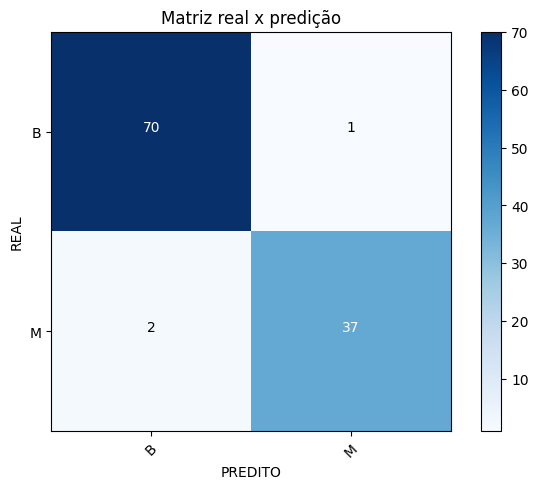

MODELO: CART
Matriz de confusão sem normalização


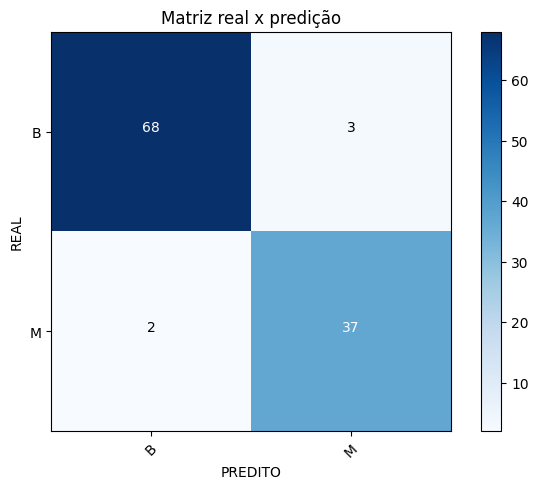

MODELO: NB
Matriz de confusão sem normalização


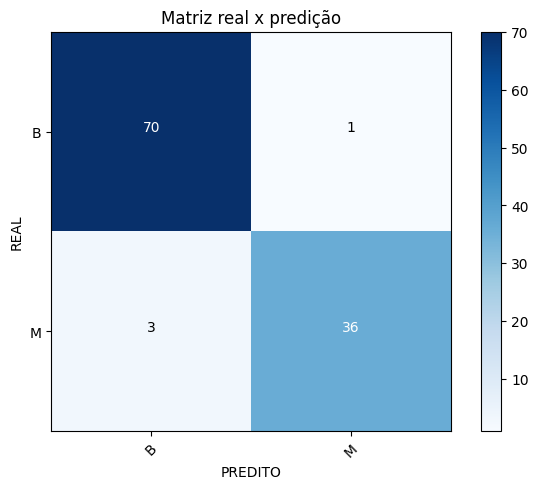

MODELO: BAG_ORIGINAL
Matriz de confusão sem normalização


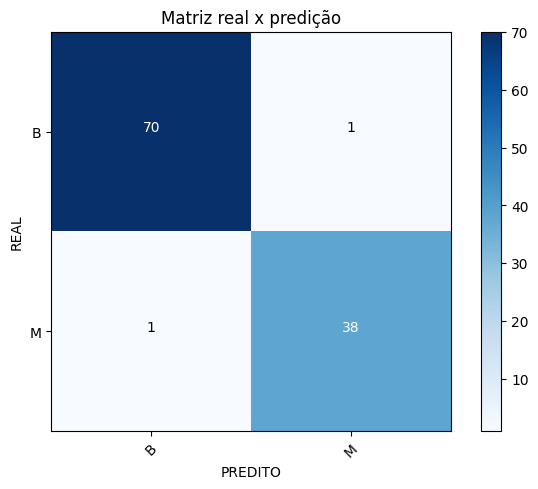

MODELO: ET_ORIGINAL
Matriz de confusão sem normalização


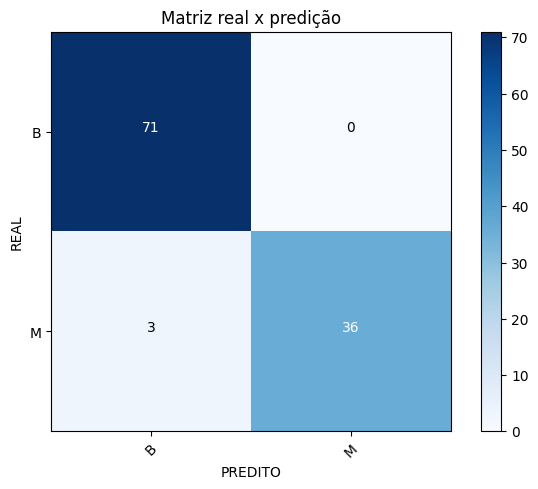

MODELO: LR_ORIGINAL
Matriz de confusão sem normalização


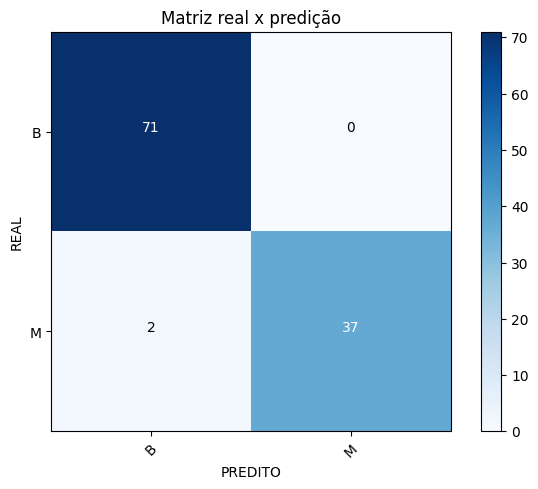

MODELO: GB_PADRONIZADO
Matriz de confusão sem normalização


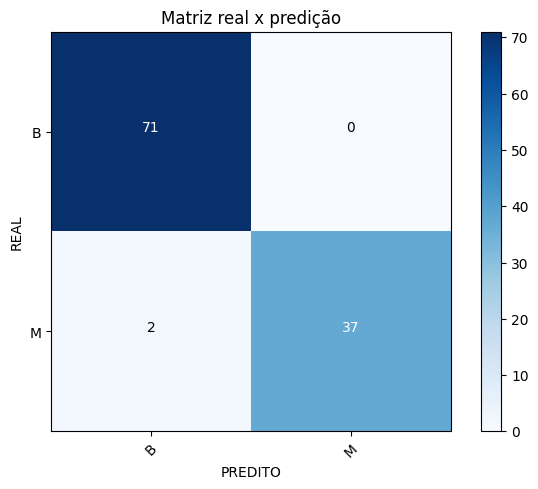

MODELO: ET_PADRONIZADO
Matriz de confusão sem normalização


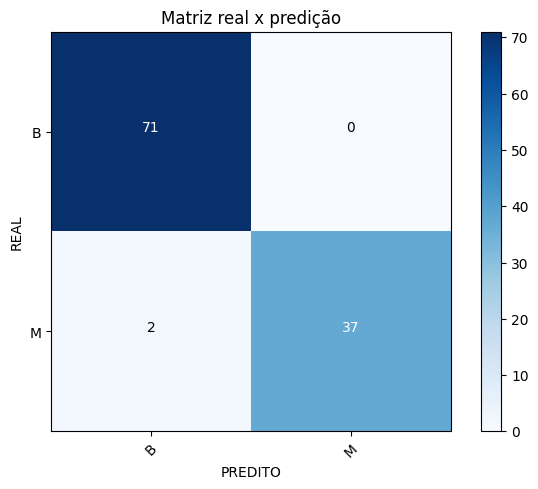

MODELO: BAG_PADRONIZADO
Matriz de confusão sem normalização


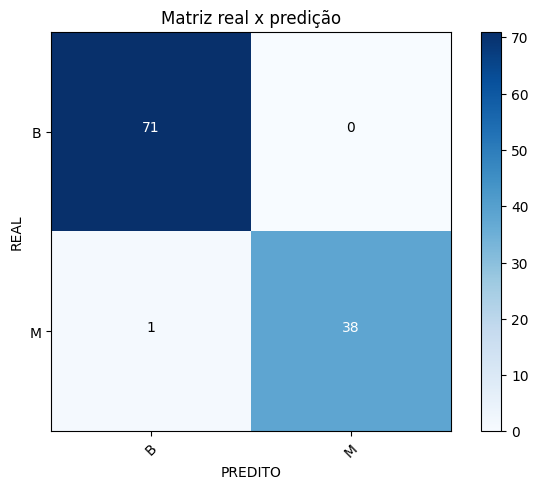

MODELO: RF_NORMALIZADO
Matriz de confusão sem normalização


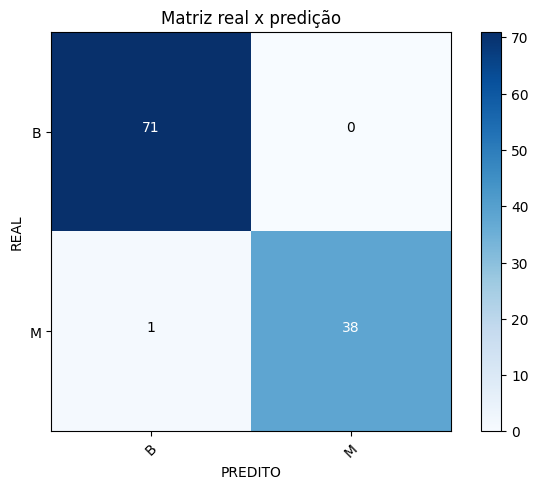

MODELO: ET_NORMALIZADO
Matriz de confusão sem normalização


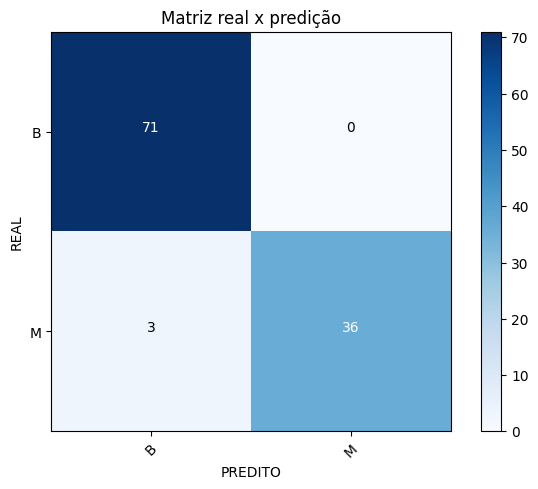

MODELO: LR_NORMALIZADO
Matriz de confusão sem normalização


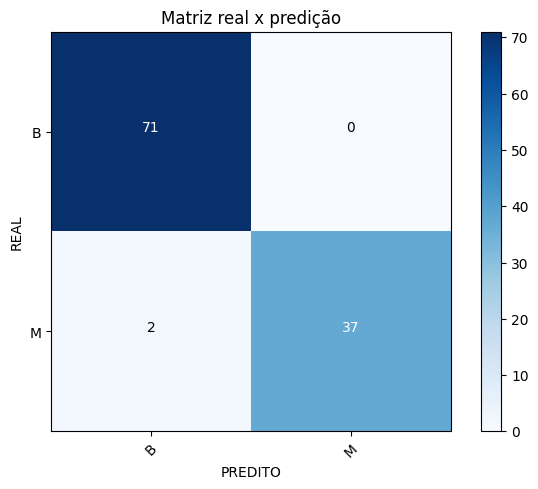

MODELO: ET_FS
Matriz de confusão sem normalização


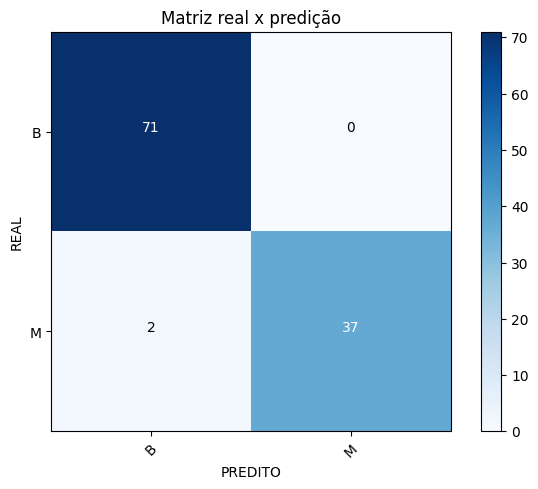

MODELO: LR_FS
Matriz de confusão sem normalização


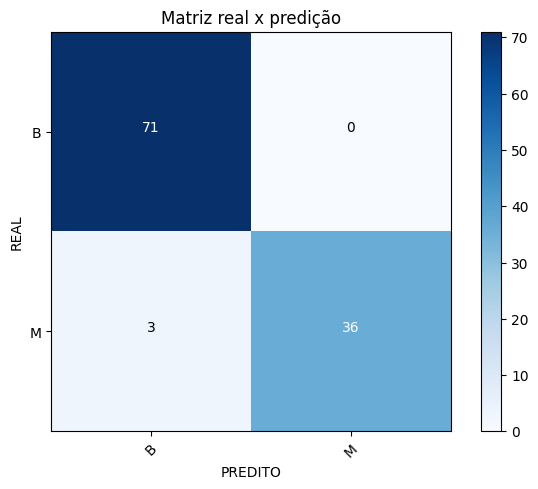

MODELO: BAG_FS
Matriz de confusão sem normalização


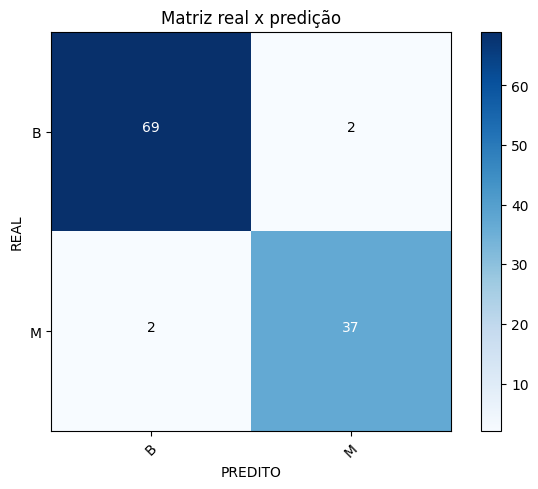

In [120]:
modelos = gerenciador.get_modelos()
for nome,modelo in modelos.items():
  print("MODELO:", nome)
  modelo.exibir_matriz_confusao()

###**3.2.4 Testes com Hiperparâmetros**

CART
Melhores hiperparâmetros:
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


,acuracia,precisao,recall,f1
0,0.972727,0.973052,0.972727,0.972803


Matriz de confusão sem normalização


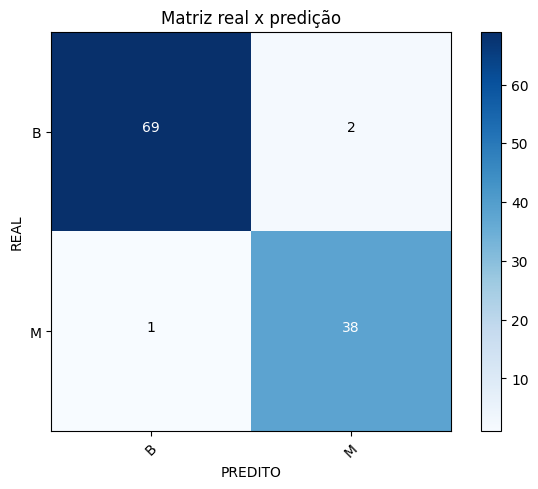

In [121]:
# Definir os hiperparâmetros a serem testados
parametros = {
   'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gerenciador.otmizar(["CART"], parametros)

###**3.2.5 Salvando o Modelo Eleito**

Os modelos BAG_PADRONIZADO e RF_NORMALIZADO estão praticamente empatados.

BAG_PADRONIZADO - é um modelo de classificação usando o algoritmo Bagging com um estimador base DecisionTreeClassifier. O pipeline inclui uma etapa de pré-processamento usando StandardScaler e, em seguida, aplica o BaggingClassifier para realizar a classificação

RF_NORMALIZADO - um modelo de classificação usando o algoritmo RandomForestClassifier. O pipeline inclui uma etapa de pré-processamento usando MinMaxScaler e, em seguida, aplica o RandomForestClassifier para realizar a classificação

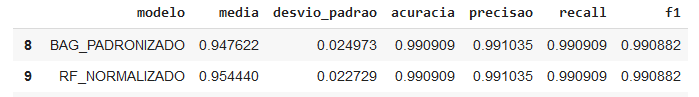

Entretanto, RF_NORMALIZADO se diferencia na média (maior) e no desvio padrão (menor). Um desvio padrão menor indica uma menor dispersão dos resultados em relação à média, o que sugere uma maior consistência e estabilidade nas previsões do modelo.

In [122]:
# obtendo o modelo eleito
model = gerenciador.get_modelos()["RF_NORMALIZADO"]

nome_modelo_salvo = model.salvar("cancer_breast_model", "mvp_sprint_2/modelos", pipeline = True)


Modelo salvo com o nome:  cancer_breast_model2023-07-19T1324.plk


###**3.2.6 Carregando o Modelo e Testando**

####**3.2.6.1 Executando com Dataset de Teste**

In [123]:
modelo_carregado = joblib.load(nome_modelo_salvo)
x = gerenciador.get_X_test()

y = gerenciador.get_y_test()

# Usar o modelo carregado para fazer previsões
y_pred = modelo_carregado.predict(x)

In [124]:
y_pred

array(['B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'B'], dtype=object)

In [125]:
y

array(['B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'B'], dtype=object)

,acuracia,precisao,recall,f1
0,0.990909,0.991035,0.990909,0.990882



Matriz de confusão sem normalização


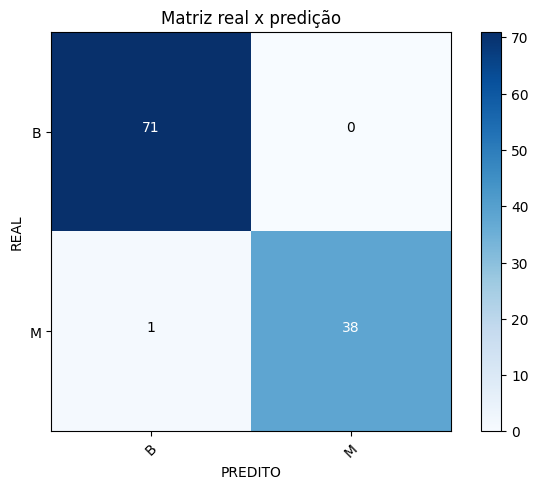

In [126]:
confusao = confusion_matrix(y, y_pred)

metricas = {
                "acuracia" : [accuracy_score(y, y_pred)],
                "precisao" : [precision_score(y, y_pred, average='weighted')],
                "recall"   : [recall_score(y, y_pred, average='weighted')],
                "f1"       : [f1_score(y, y_pred, average='weighted')]
    }


df = dicionario_para_dataframe(metricas)

display(df)
print("")

plot_confusion_matrix(confusao,
                      classes=["B","M"],
                      normalize= False,
                      title='Matriz real x predição')

####**3.2.6.2 Executando com Dataset de Validação**

Exibindo o connteúdo do dataset de validação

In [127]:
dataset_breast_cancer_validacao.head(10)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,M
1,842517.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,M
2,84300903.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,M
3,84348301.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,M
4,84358402.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,M
5,843786.0,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,M
6,844359.0,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,M
7,84458202.0,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,M
8,8510426.0,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,...,19.26,99.70,711.2,0.1440,0.1773,0.2390,0.12880,0.2977,0.07259,B
9,8510653.0,13.08,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,...,20.49,96.09,630.5,0.1312,0.2776,0.1890,0.07283,0.3184,0.08183,B


In [128]:
y_validacao = dataset_breast_cancer_validacao["diagnosis"].values
y_validacao

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B'], dtype=object)

Selecionando as colunas

In [129]:
# df = normalizar_dataset(dataset_breast_cancer_validacao, 1, 30)
df = dataset_breast_cancer_validacao.iloc[:,1:31]
df.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,15.11,19.26,99.70,711.2,0.1440,0.1773,0.2390,0.12880,0.2977,0.07259
9,13.08,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811,...,14.50,20.49,96.09,630.5,0.1312,0.2776,0.1890,0.07283,0.3184,0.08183


Realizando as predições

observação: o modelo já inclui a tarefa de normalização no pipeline, por isso não foi necessário normalizar manualmente o dataset

In [130]:
y_pred_validacao = modelo_carregado.predict(df)
y_pred_validacao

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B'], dtype=object)

Exibindo métricas e matriz de confusão

,acuracia,precisao,recall,f1
0,1.0,1.0,1.0,1.0



Matriz de confusão sem normalização


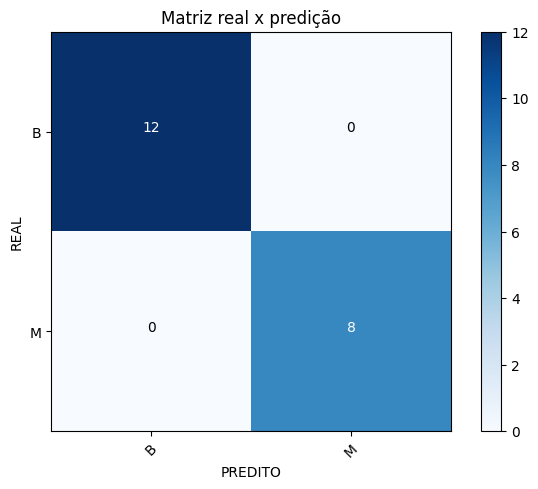

In [131]:
confusao = confusion_matrix(y_validacao, y_pred_validacao)

metricas = {
                "acuracia" : [accuracy_score(y_validacao, y_pred_validacao)],
                "precisao" : [precision_score(y_validacao, y_pred_validacao, average='weighted')],
                "recall"   : [recall_score(y_validacao, y_pred_validacao, average='weighted')],
                "f1"       : [f1_score(y_validacao, y_pred_validacao, average='weighted')]
    }


df = dicionario_para_dataframe(metricas)

display(df)
print("")

plot_confusion_matrix(confusao,
                      classes=["B","M"],
                      normalize= False,
                      title='Matriz real x predição')

###**4 Conclusão**

O objetivo do projeto foi comaprar vários modelos e de acordo com os resultados eleger um que possa ser usado na identificação de cancer de mama usando as análises de biópsias.

Foram usados os seguintes modelos e transformações:

**Modelos**:


* **KNN - KNeighborsClassifier**

* **CART - DecisionTreeClassifier**

* **NB - GaussianNB**

* **SVM -  Support Vector Classifier**

* **LR - LogisticRegression**

**Ensembles**:
* **BAG - BaggingClassifier**

* **RF - RandomForestClassifier**

* **ET - ExtraTreesClassifier**

* **ADA - AdaBoostClassifier**

* **GB - GradientBoostingClassifier**

**Transformações**:
* **Feature Selection**
* **StandardScaler**
* **min_max_scaler**

Também foi feita a otmização de hiperparâmetros, apenas como demostração, para o modelo **CART - DecisionTreeClassifier**.

Este é um projeto orientado a objetos que visa encapsular e reutilizar várias funcionalidades e tentar trazer uma melhor leitura, focando no objetivo, que é agrupar e comaprar vários modelos.

Também, referente a este projeto, trata-se de um agrupamento de modelos supervisionados de classificação. O objetivo é construir um modelo que possa classificar automaticamente um exame de biópsia em MALIGNO ou BENIGNO.

O modelo eleito foi o Random Florest (RandomForestClassifier) usando um dataset que foi NORMALIZADO usando MinMaxScaler. O processamento foi feito usando um pipeline que fez em sequência a transformação e o treino do modelo.

 O Random Florest teve uma performance idêntica ao  Bagging, com um estimador base DecisionTreeClassifier, nos parâmetros acurácia, precisao, recall e f1. Contudo, o Random Florest teve a média da acurácia maior e o desvio padrão menor, esses dois parâmetros desempataram a comparação entre os modelos.

Uma futura melhoria seria aplicar a otimização de hiperparâmetros a cada uma das combinações de modelos que foram testados. Muitos hiperparâmetros usados pelos modelos de base entravam em conflito com as transformações usadas nos pipelines. Por isso foi feito apenas um teste com Decision Tree Classifier.

O modelo eleito, Randon Forest com normalização, obteve uma performance de 100% de acurácia ao predizer o resultado dos diagnósticos no dataset de validação, mas esse resultado é apenas um indicador que a escolha desse modelo tem boas perspetivas de alcançar boas previsões pois a quantidade de dados avaliados foi muito pouca, apenas 20 registros. Esse modelo precisa ser avaliado com mais registros para termos melhores métricas para avaliar sua performance.